# 1.  Importar librerías, paquetes y validar conexión a Kaggle Input

In [1]:
!pip install torchsummary  # Instalar torchsummary para resumir el modelo de la red neuronal convolucional (CNN).

In [2]:
# Este entorno de Python 3 viene con muchas bibliotecas de análisis útiles instaladas
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Por ejemplo, aquí hay varios paquetes útiles para cargar
from __future__ import print_function, division # Importar funciones de división y impresión de Python 3
from tqdm import tqdm, tqdm_notebook # Importar la barra de progreso de TQDM para mostrar el progreso de las tareas
tqdm_notebook().pandas() # Importar la barra de progreso de TQDM para mostrar el progreso de las tareas en Jupyter Notebook
import numpy as np # linear algebra # Importar la biblioteca NumPy para realizar cálculos matemáticos en Python
import pandas as pd  # Importar la biblioteca Pandas para trabajar con estructuras de datos en Python
from numpy.typing import NDArray # Importar el tipo de datos de la matriz NumPy
from functools import reduce # Importar la función reduce de la biblioteca functools para reducir una lista a un solo valor
from itertools import islice # Importar la función islice de la biblioteca itertools para cortar una secuencia
import wandb # Importar la biblioteca Weights & Biases para realizar un seguimiento de los experimentos de aprendizaje profundo
import math # Importar la biblioteca Math para realizar operaciones matemáticas en Python
from itertools import chain # Importar la función chain de la biblioteca itertools para concatenar iterables
import copy # Importar la biblioteca Copy para realizar copias de objetos en Python
from PIL import Image # Importar la biblioteca Image de la biblioteca PIL para trabajar con imágenes en Python
import torch # Importar la biblioteca PyTorch para realizar cálculos de aprendizaje profundo en Python
from torch import nn # Importar el módulo nn de la biblioteca PyTorch para construir redes neuronales en Python
from torch import Tensor # Importar el tipo de datos Tensor de la biblioteca PyTorch
from torch.optim import Optimizer # Importar el optimizador de la biblioteca PyTorch para optimizar los pesos de la red neuronal
import torch.nn.functional as F # Importar el módulo F de la biblioteca PyTorch para aplicar funciones de activación en Python
import torchvision # Importar la biblioteca TorchVision para realizar tareas de visión por computadora en PyTorch
from torch.utils.data import Dataset, DataLoader # Importar la clase Dataset y DataLoader de la biblioteca PyTorch para cargar y procesar datos
from torchvision import transforms, utils # Importar las transformaciones y utilidades de la biblioteca TorchVision
from torchsummary import summary # Importar la función summary de la biblioteca torchsummary para resumir el modelo de la red neuronal convolucional (CNN)
import albumentations as A # Importar la biblioteca Albumentations para realizar aumentos de datos en Python
from sklearn.model_selection import train_test_split  # Importar la función train_test_split de la biblioteca scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba
from multiprocessing import cpu_count # Importar la función cpu_count de la biblioteca multiprocessing para obtener el número de núcleos de la CPU
import os # Importar la biblioteca OS para interactuar con el sistema operativo
import os.path as osp # Importar la biblioteca OS para interactuar con el sistema operativo
from skimage import io, transform # Importar las funciones io y transform de la biblioteca skimage para trabajar con imágenes
import matplotlib.pyplot as plt # Importar la biblioteca Matplotlib para visualizar datos en Python
import typing as ty # Importar la biblioteca typing para realizar comprobaciones de tipos en Python
import cv2 # Importar la biblioteca OpenCV para trabajar con imágenes en Python
plt.ion()   # Modo interactivo de Matplotlib

# Input data files are available in the read-only "../input/" directory # Los archivos de datos de entrada están disponibles en el directorio de solo lectura "../input/"
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory # Por ejemplo, ejecutar esto (haciendo clic en ejecutar o presionando Shift+Enter) mostrará todos los archivos en el directorio de entrada
# Recorrer los archivos en el directorio de entrada, incluidos los subdirectorios, y mostrar los primeros 10 archivos, si los hay.
# Os.walk() genera los nombres de los archivos en un directorio de forma recursiva
for root, dirs, filenames in os.walk('/kaggle/input'):
    for i, filepath in enumerate(filenames):
        if i >= 10:
            print()
            break
        print(osp.join(root, filepath))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" # Puede escribir hasta 20 GB en el directorio actual (/kaggle/working/) que se conserva como salida cuando crea una versión usando "Guardar y ejecutar todo"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session # También puede escribir archivos temporales en /kaggle/temp/, pero no se guardarán fuera de la sesión actual

/tmp/ipykernel_30/2569820502.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas() # Importar la barra de progreso de TQDM para mostrar el progreso de las tareas en Jupyter Notebook


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


/kaggle/input/af-ii-2024-ii-object-localization/sample_submission.csv
/kaggle/input/af-ii-2024-ii-object-localization/train.csv
/kaggle/input/af-ii-2024-ii-object-localization/test.csv
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_222_.jpg
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_559_.jpg
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_362_.jpg
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_480_.jpg
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_355_.jpg
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_450_.jpg
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_113_.jpg
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_337_.jpg
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_055_.jpg
/kaggle/input/af-ii-2024-ii-object-localization/images/image_id_383_.jpg

/kaggle/input/dataalvaro/data_augmentation/train - copia.xlsm
/kaggle/input/dataalva

# 2. Verificación CUDA

In [3]:
#Validacón de CUDA
torch.manual_seed(32) # Establecer la semilla aleatoria para PyTorch
device = 'cuda' if torch.cuda.is_available() else 'cpu' # Verificar si CUDA está disponible y establecer el dispositivo en 'cuda' si es así, de lo contrario, establecerlo en 'cpu'
print(f'Using {device}') # Imprimir el dispositivo que se está utilizando
test = torch.ones((100, 100)).to(device) # Crear un tensor de unos con forma (100, 100) y moverlo al dispositivo
del test # Eliminar el tensor de la memoria
torch.cuda.empty_cache() # Vaciar la memoria caché de CUDA

Using cuda


# 3. Configurar URL

In [4]:
# Configuración de carpetas fuente y de trabajo
#-----------------------..........Directorio de datos y de trabajo-------------------------------
DATA_DIR = '/kaggle/input/af-ii-2024-ii-object-localization/' # Establecer el directorio de datos
#DATA_DIR = '/kaggle/input/dataalvaro/data_augmentation' # Establecer el directorio de datos
WORK_DIR = '/kaggle/working' # Establecer el directorio de trabajo
#------------------------------------------------------------------------------------------------
#-----------------------------------Directorio de imágenes---------------------------------------
img_dir = osp.join(DATA_DIR, "images") # Establecer el directorio de imágenes: pregunta: ¿este código se repite más abajo en numeral 10 con otra variable?
#------------------------------------------------------------------------------------------------

# 4.  Batch Size

In [5]:
#------------------------------Batch_Size ¿pregunta: debería ir aquí?----------------------------
BATCH_SIZE = 32 # Establecer el tamaño del lote
#Alfredo: ¿modificar?
#Pregunta: ¿por qué el batch size se repite y se modifica durante el código: ejemplo numarales: 17, run y submission?
#R// Se habia planteado inicialmente como 32, pero cuando estaba ejecutando se caia por memoria, entonces para el entrenamiento se ajustó a 16. En otras partes se ejecuta para ejemplos especificos. Es decir, este se puede omitir
#------------------------------------------------------------------------------------------------

# 5. Asignación de clases

In [6]:
#-----------------------------------Asignación de clases-----------------------------------------
# ----Aquí asignamos a cada clase un índice de 0 a n_classes - 1
df = pd.read_csv(osp.join(DATA_DIR, "train.csv")) # Leer el archivo CSV de entrenamiento
df['class_id'] = np.where(df['class_id']==2,1,0) # Convertir la clase 2 en 1
#------------------------------------------------------------
#--------Pregunta: ¿esta parte del código sobra?------------- R// Si, se había planteado inicialmente para una conversión de los datos crudos, pero sobra para el ejercicio.
obj2id = { # Crear un diccionario que mapea cada objeto a un ID
    "penguin": 0, # Mapear el objeto "penguin" al ID 0
    "turtle": 1 # Mapear el objeto "turtle" al ID 1
}
#------------------------------------------------------------
#--------Asigna a variable dicotómica su significado---------
id2obj = { # Crear un diccionario que mapea cada ID a un objeto
    0: "penguin", # Mapear el ID 0 al objeto "penguin"
    1: "turtle" # Mapear el ID 1 al objeto "turtle"
}
#------------------------------------------------------------
#------------------------------------------------------------------------------------------------

# 6. Configuración y normalización bounding boxes de imágenes

In [7]:
#----------------------------------Configuración de imágenes-------------------------------------
hw_real=640 # Establecer el tamaño real de la imagen
h, w, c = 255, 255, 3  # La altura, el ancho (a los que se quiere transformar la imagen) y el número de canales de cada imagen
#------------------------------------------------------------------------------------------------
#----------------Transforma coordenadas del bounding box de  relativas a absolutas----------------
df['xmax'] = df['xmin'] + df['xmax'] # Calcular la coordenada x máxima, dado que las referencias son relativas y no absolutas
df['ymax'] = df['ymin'] + df['ymax'] # Calcular la coordenada y máxima, dado que las referencias son relativas y no absolutas
df["class"] = df["class_id"].map(id2obj) # Mapear el ID de la clase al objeto correspondiente (asignar el diccionario de clases)
#Normalizamos las cajas delimitadoras
df[["xmin", "ymin", "xmax", "ymax"]] /= hw_real # Normalizar las coordenadas de las cajas delimitadoras

In [8]:
#Visualizamos el dataset
print("df shape:", df.shape)
df.head(5)

df shape: (474, 8)


,filename,xmin,ymin,xmax,ymax,class_id,new_split,class
0,image_id_000_.jpg,0.473438,0.790625,0.512500,0.846875,0,train,penguin
1,image_id_001_.jpg,0.610938,0.434375,0.710938,0.473438,1,train,turtle
2,image_id_002_.jpg,0.489063,0.664062,0.573438,0.721875,1,train,turtle
3,image_id_003_.jpg,0.489063,0.562500,0.557813,0.637500,1,train,turtle
4,image_id_005_.jpg,0.465625,0.396875,0.542188,0.479687,1,train,turtle


# 7. Protocolo de evaluación

In [9]:
RANDOM_SEED = 42  
train_df, val_df = train_test_split( # Dividir el conjunto de datos en conjuntos de entrenamiento y validación
    df, stratify=df['class_id'], test_size=0.25 #, random_state=RANDOM_SEED # Dividir el conjunto de datos en conjuntos de entrenamiento y validación
) #stratify, #asegura que la división de datos entre los conjuntos de entrenamiento y validación se realice de manera estratificada, manteniendo la proporción de clases en ambos conjuntos. Esto es especialmente útil cuando el conjunto de datos es desequilibrado (es decir, cuando algunas clases están representadas con más frecuencia que otras).

#Alfredo: ¿deberíamos entrenar con datos aleatorios o fijamos una semilla? R// Dado que no estamos usando un protocolo de evaluacion cv, pero si estamos realizando varias pruebas con diferentes combinaciones de arquitecturas, me iria por no fijar una semilla.
print("train_df_shape:",train_df.shape) # Imprimir la forma del conjunto de datos de entrenamiento
print("val_df_shapre:", val_df.shape)  # Imprimir la forma del conjunto de datos de validación

train_df_shape: (355, 8)
val_df_shapre: (119, 8)


In [10]:
#Verificamos las clases únicas
classes = df["class"].unique() # Obtener las clases únicas
classes # Mostrar las clases únicas

array(['penguin', 'turtle'], dtype=object)

In [11]:
# Mostrar el porcentaje de clases en el conjunto de datos de entrenamiento
train_df['class'].value_counts(1) * 100 

class
penguin    50.140845
turtle     49.859155
Name: proportion, dtype: float64

In [12]:
# Mostrar el porcentaje de clases en el conjunto de datos de validación
val_df['class_id'].value_counts(1) * 100 

class_id
1    50.420168
0    49.579832
Name: proportion, dtype: float64

# 8. Clase imageDataset (conjunto de datos para cargar y preprocesar imágenes con etiquetas y bounding boxes)

In [13]:

transform_func_inp_signature = ty.Dict[str, NDArray[np.float_]] # Definir la firma de la función de transformación de entrada
transform_func_signature = ty.Callable[ # Definir la firma de la función de transformación
    [transform_func_inp_signature], # La función toma un diccionario de matrices NumPy como entrada
    transform_func_inp_signature # La función devuelve un diccionario de matrices NumPy como salida
]

class imageDataset(Dataset): # Definir la clase imageDataset
   
    #Location image dataset
  
    def __init__( # Definir el método __init__
        self, # La instancia de la clase
        df: pd.DataFrame, #   El DataFrame que contiene las rutas de las imágenes y las etiquetas
        root_dir: str, # El directorio raíz que contiene las imágenes
        labeled: bool = True, # Si el conjunto de datos contiene etiquetas
        transform: ty.Optional[ty.List[transform_func_signature]] = None, # Las transformaciones que se aplicarán a las imágenes
        output_size: ty.Optional[tuple] = None  # Añadir parámetro para tamaño de salida # El tamaño de salida de las imágenes
    ) -> None: # La función no devuelve nada
        self.df = df # Establecer el DataFrame
        self.root_dir = root_dir # Establecer el directorio raíz
        self.transform = transform #    Establecer las transformaciones
        self.labeled = labeled # Establecer si el conjunto de datos contiene etiquetas
        self.output_size = output_size  # Almacenar el tamaño de salida # Establecer el tamaño de salida

    def __len__(self): # Definir el método __len__
        return self.df.shape[0] # Devolver el número de filas en el DataFrame

    def __getitem__(self, idx: int) -> transform_func_signature: # Definir el método __getitem__
        if torch.is_tensor(idx): # Si el índice es un tensor
            idx = idx.tolist() # Convertir el índice a una lista
        # Read image
        img_name = os.path.join(self.root_dir, self.df.filename.iloc[idx]) # Obtener la ruta de la imagen
        image = io.imread(img_name) # Leer la imagen

        #print(f"Dimensiones originales de la imagen: {image.shape}")  # Agregar para depuración
        if image.ndim == 2:  # Si la imagen está en escala de grises
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  # Convertir a RGB
        elif image.shape[2] == 4:  # Si la imagen es RGBA # Si la imagen es RGBA
            image = image[:, :, :3] # Eliminar el canal alfa # Eliminar el canal alfa

        # Redimensionar la imagen si se especifica un tamaño de salida
        if self.output_size: # Si se especifica un tamaño de salida
            image = cv2.resize(image, self.output_size)  # Redimensionar la imagen # Redimensionar la imagen
        sample = {'image': image} # Crear un diccionario con la imagen

        if self.labeled: # Si el conjunto de datos contiene etiquetas
            # Read labels # Leer las etiquetas
            img_class = self.df.class_id.iloc[idx] # Obtener la clase de la imagen
            #name_class = self.df['class'].iloc[idx] # Obtener el nombre de la clase
            img_bbox = self.df.iloc[idx, 1:5] # Obtener las coordenadas de la caja delimitadora
            #img_h = self.df.h.iloc[idx]
            #img_w = self.df.w.iloc[idx]
            img_bbox = np.array([img_bbox]).astype('float') # Convertir las coordenadas de la caja delimitadora a un array de NumPy
            img_class = np.array([img_class]).astype('int') # Convertir la clase de la imagen a un array de NumPy
            #img_h = np.array([img_h]).astype('int')
            #img_w = np.array([img_w]).astype('int')
            sample.update({'bbox': img_bbox, 'class_id': img_class})#,'name_class':name_class,'w': img_w, 'h': img_h # Añadir las etiquetas al diccionario

        if self.transform: # Si se especifican transformaciones
            sample = self.transform(sample) # Aplicar las transformaciones a la imagen

        return sample # Devolver el diccionario con la imagen y las etiquetas


# 9.  Funciones para dibujar bounding boxes y etiquetas de clase en imágenes.

In [14]:
def draw_bbox(img, bbox, color): # Definir la función draw_bbox
    xmin, ymin, xmax, ymax = bbox # Obtener las coordenadas de la caja delimitadora
    img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color, 2) # Dibujar la caja delimitadora en la imagen
    return img # Devolver la imagen con la caja delimitadora dibujada

def normalize_bbox(bbox, factor : int = 255): # Definir la función normalize_bbox
    return list(map(lambda x: int(x * factor), bbox)) # Normalizar las coordenadas de la caja delimitadora
'''
def normalize_bbox(bbox, factor_h: int =1 ,factor_w: int=1):
    # Iterar a través de la lista utilizando un bucle for con el índice
    for i in range(len(bbox)):
        if i % 2 == 0:  # Comprobar si el índice es par
            nuevo_valor = int(bbox[i]*factor_w).astype('int')
        else:  # El índice es impar
            nuevo_valor = int(bbox[i]*factor_h).astype('int')
        bbox[i] = int(nuevo_valor).astype('int')
        print(f"Valor: {bbox[i]}, Tipo: {type(bbox[i])}")
    return bbox
    #return list(map(lambda x: int(x * factor), bbox))
'''
def draw_bboxes(imgs, bboxes, colors): # Definir la función draw_bboxes
    for i, (img, bbox, color) in enumerate(zip(imgs, bboxes, colors)): # Iterar a través de las imágenes, las cajas delimitadoras y los colores
        imgs[i] = draw_bbox(img, bbox, color) # Dibujar la caja delimitadora en la imagen
    return imgs

def draw_classes(imgs, classes, colors, origin, offset: int = 5, prefix: str =''): # Definir la función draw_classes
    for i, (img, class_id, color) in enumerate(zip(imgs, classes, colors)): # Iterar a través de las imágenes, las clases y los colores
        if type(c)==list: # Comprobar si la clase es una lista
            name_class_=id2obj[classes[i]] # Obtener el nombre de la clase
        else: # La clase no es una lista
            name_class_=id2obj[classes[i][0]] # Obtener el nombre de la clase
        imgs[i] = cv2.putText( # Añadir el nombre de la clase a la imagen
            img, f'{prefix}{name_class_}', #class_id.squeeze() # Añadir el nombre de la clase a la imagen
            origin, cv2.FONT_HERSHEY_SIMPLEX, # Añadir el nombre de la clase a la imagen
            0.4, color, 1, cv2.LINE_AA # Añadir el nombre de la clase a la imagen
        )
    return imgs # Devolver las imágenes con las clases añadidas

def draw_predictions(imgs, classes, bboxes, colors, origin): # Definir la función draw_predictions
    assert all(len(x) > 0 for x in [imgs, classes, bboxes, colors]) # Comprobar si todas las listas tienen al menos un elemento
    if len(colors) == 1: # Comprobar si la lista de colores tiene un solo elemento
        colors = [colors[0] for _ in imgs] # Repetir el color para cada imagen
    imgs = draw_bboxes(imgs, bboxes, colors) # Dibujar las cajas delimitadoras en las imágenes
    imgs = draw_classes(imgs, classes, colors, origin) # Añadir las clases a las imágenes
    return imgs # Devolver las imágenes con las predicciones

# 10. Configurar dataset de imágenes de entrenamiento y muestra del dataset de entrenamiento

In [15]:
#Visualizamos los primeros 6 registros de train_df
train_df.head(6)

,filename,xmin,ymin,xmax,ymax,class_id,new_split,class
454,image_id_549_.jpg,0.126562,0.128125,0.790625,1.000000,0,train,penguin
132,image_id_159_.jpg,0.403125,0.285938,0.600000,0.790625,0,train,penguin
400,image_id_484_.jpg,0.142187,0.160938,0.879687,0.756250,1,train,turtle
165,image_id_201_.jpg,0.237500,0.378125,0.756250,0.617188,1,train,turtle
144,image_id_171_.jpg,0.328125,0.295312,0.500000,0.904687,0,train,penguin
252,image_id_303_.jpg,0.290625,0.334375,0.782813,0.743750,1,train,turtle


In [16]:
train_root_dir = osp.join(DATA_DIR, "images")#, "train" # Establecer el directorio raíz de entrenamiento
print(train_root_dir)
train_ds = imageDataset(df=train_df, root_dir=train_root_dir, labeled=True, transform=None, output_size=(255,255)) 
# Crear el conjunto de datos de entrenamiento. #Pregunta: ¿aquí se redimensionan las imágenes?
#    def _init_(self, df, root_dir, labeled=True, transform=None, output_size=None):
#R// Si, en la clase imageDataset incluimos esta transformacion 
# # Redimensionar la imagen si se especifica un tamaño de salida
      #  if self.output_size:
      #      image = cv2.resize(image, self.output_size)  # Redimensionar la imagen 

/kaggle/input/af-ii-2024-ii-object-localization/images


In [17]:
# -------------------Variables para configurar la cantidad de imágenes a mostrar---------------
num_imgs = 6 # Número de imágenes a mostrar
start_idx = 0 # Índice de inicio
#----------------------------------------------------------------------------------------------
#------------------------Bucles para cargar las imágenes--------------------------------------
samples = [train_ds[i] for i in range(start_idx, num_imgs)] # Obtener las muestras de entrenamiento
imgs = [s['image'] for s in samples] # Obtener las imágenes
#--------------------------------------------------------------------------------------------

# 11. Configuracion, visualización bounding boxes (conjunto de muestra de la celda anterior)

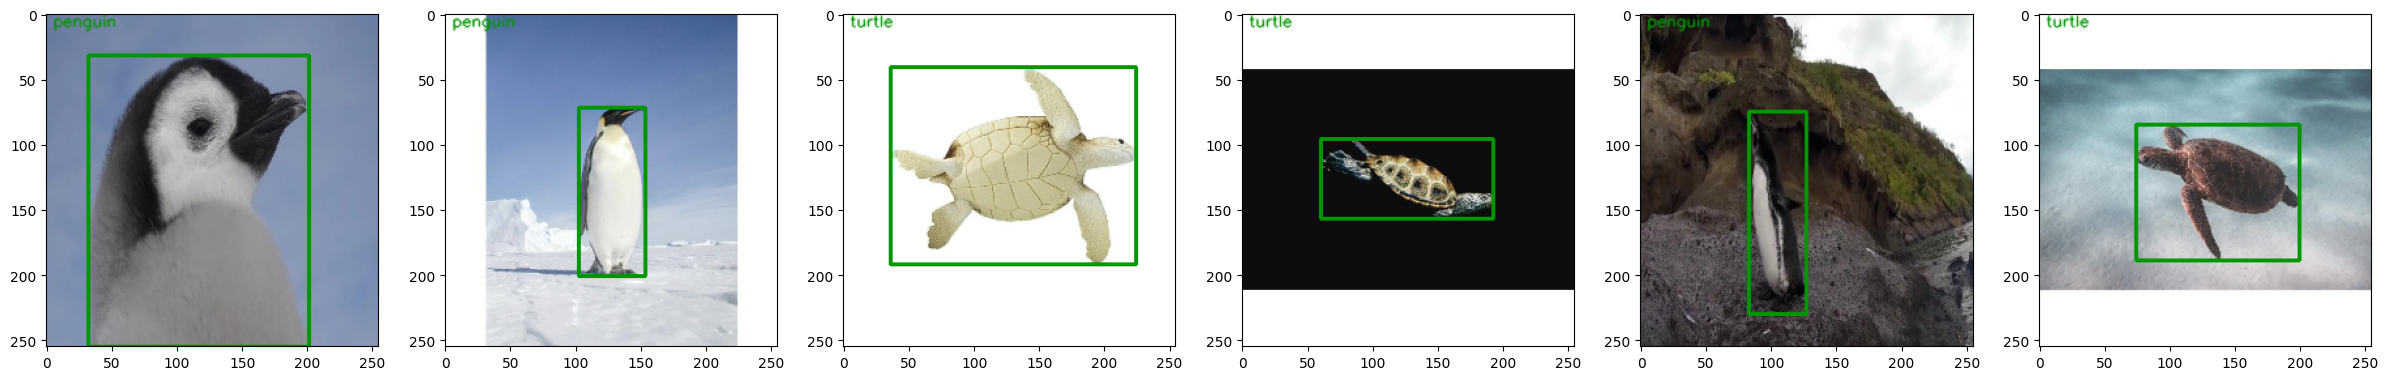

In [18]:
bboxes = [normalize_bbox(s['bbox'].squeeze()) for s in samples] # Obtener las cajas delimitadoras normalizadas
classes = [s['class_id'] for s in samples] # Obtener las clases

#----------------------------------------Configuración de formato (color, grosor) del bounding box-----------------
#[(0, 150, 0)]: Lista que define el color que se utilizará para dibujar las predicciones. 
#En este caso, (0, 150, 0) corresponde a un color verde en formato RGB, 
#donde el valor 150 indica la intensidad del canal verde.
#(5, 10): Probablemente especifica el grosor de la línea de los cuadros y el tamaño de la fuente para las etiquetas de predicción. 
#(5, 10) puede representar estos dos valores en ese orden.
imgs = draw_predictions(imgs, classes, bboxes, [(0, 150, 0)], (5, 10))#(150, 10) # Dibujar las predicciones en las imágenes
#-----------------------------------------------------------------------------------------------------------------

#--------------------------------------------------Construye la visualización-------------------------------------
#figsize=(30, num_imgs): Este argumento define el tamaño de la figura en pulgadas. 
#En este caso, se establece un ancho de 30 pulgadas y una altura que depende de la variable num_imgs. 
#El valor de num_imgs podría ser un entero que representa el número de imágenes o el número de subgráficas que se desea mostrar en la figura.

fig = plt.figure(figsize=(30, num_imgs)) # Crear una figura de Matplotlib
for i, img in enumerate(imgs): # Iterar a través de las imágenes
    fig.add_subplot(1, num_imgs, i+1) # Añadir un subplot a la figura
    plt.imshow(img) # Mostrar la imagen

plt.show() # Mostrar la figura
#---------------------------------------------------------------------------------------------------------------
#Pregunta: ¿cómo se el código de la imagen? R// No entiendo 

In [19]:
# Mostrar la tercera imagen
# Pregunta: recordar cómo se interpreta el siguiente array: R// [255, 255, 255] representa un píxel blanco en formato RGB (donde 255 es el valor máximo de intensidad en cada canal, lo que resulta en color blanco cuando todos los canales tienen su valor máximo).
##Cada fila del array representa una línea horizontal de la imagen.
##Cada columna de esa fila representa un píxel individual en esa posición de la imagen.
##Este patrón de [255, 255, 255] repetido indica que la imagen esta cubierta por mucho blanco, ya que todos los píxeles tienen el valor máximo en cada canal RGB.
samples[2]['image'] 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# 12. Transfer learning (modelo vgg16: previamente desarrollado para reutilizar)



En nuestro caso, nos interesa obtener un modelo previamente entrenado para usarlo como columna vertebral que haya sido entrenado en otras tareas. Por ejemplo, si queremos usar vgg16 como nuestra columna vertebral, no necesitaríamos el último módulo de clasificación y mantendríamos el módulo de grupo promediado como fuente de características para realizar ambas tareas.


In [20]:
'''
#Alfredo: modificar
from torchvision.models import vgg16 # Importar el modelo VGG-16 de TorchVision

class FeatureExtractor(nn.Module): # Definir la clase FeatureExtractor
    def __init__(self, model): # Definir el método __init__
        super(FeatureExtractor, self).__init__() # Inicializar la clase base
        # Extract VGG-16 Feature Layers # Extraer las capas de características de VGG-16
        self.features = list(model.features) # Obtener las capas de características de VGG-16
        self.features = nn.Sequential(*self.features) # Convertir las capas de características en un módulo secuencial
        # Extract VGG-16 Average Pooling Layer # Extraer la capa de agrupación promedio de VGG-16
        self.pooling = model.avgpool # Obtener la capa de agrupación promedio de VGG-16
        # Convert the image into one-dimensional vector # Convertir la imagen en un vector unidimensional
        self.flatten = nn.Flatten() # Aplanar la imagen
        self.dropout = nn.Dropout(0.5) # Añadir una capa de abandono con una probabilidad de 0.5: apagar el 50% de las neuronas

    def forward(self, x): # Definir el método forward
         # Tomará la entrada 'x' hasta que devuelva el vector de características llamado 'out'
        out = self.features(x) # Pasar la entrada a través de las capas de características
        out = self.pooling(out) # Pasar la salida a través de la capa de agrupación promedio
        out = self.flatten(out) # Aplanar la salida
        out = self.dropout(out) # Aplicar la capa de abandono
        return out

# Load the vgg16 model # Cargar el modelo VGG-16
vgg16_model = vgg16(pretrained=True, progress=True) # Cargar el modelo VGG-16 preentrenado
pretrained_model = FeatureExtractor(vgg16_model).to(device) # Crear una instancia de la clase FeatureExtractor y moverla al dispositivo
pretrained_model # Mostrar el modelo preentrenado
'''


"\n#Alfredo: modificar\nfrom torchvision.models import vgg16 # Importar el modelo VGG-16 de TorchVision\n\nclass FeatureExtractor(nn.Module): # Definir la clase FeatureExtractor\n    def __init__(self, model): # Definir el método __init__\n        super(FeatureExtractor, self).__init__() # Inicializar la clase base\n        # Extract VGG-16 Feature Layers # Extraer las capas de características de VGG-16\n        self.features = list(model.features) # Obtener las capas de características de VGG-16\n        self.features = nn.Sequential(*self.features) # Convertir las capas de características en un módulo secuencial\n        # Extract VGG-16 Average Pooling Layer # Extraer la capa de agrupación promedio de VGG-16\n        self.pooling = model.avgpool # Obtener la capa de agrupación promedio de VGG-16\n        # Convert the image into one-dimensional vector # Convertir la imagen en un vector unidimensional\n        self.flatten = nn.Flatten() # Aplanar la imagen\n        self.dropout = nn

In [21]:
from torchvision.models import vgg16

class FeatureExtractor(nn.Module):  # Definir la clase FeatureExtractor
    def __init__(self, model):  # Definir el método __init__
        super(FeatureExtractor, self).__init__()  # Inicializar la clase base
        # Extraer las capas de características de VGG-16
        self.features = list(model.features)  # Obtener las capas de características de VGG-16
        self.features = nn.Sequential(*self.features)  # Convertir las capas de características en un módulo secuencial
        
        # Nueva capa convolucional que añadimos después de las capas de VGG-16
        self.conv_additional = nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1)  # Nueva capa convolucional
        self.batch_norm_additional = nn.BatchNorm2d(1024)  # BatchNorm para estabilizar el entrenamiento
        self.relu_additional = nn.ReLU()  # Activación ReLU
        self.pool_additional = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)  # MaxPooling para reducir dimensiones
        
        # Extraer la capa de agrupación promedio de VGG-16
        self.pooling = model.avgpool  # Obtener la capa de agrupación promedio de VGG-16
        
        # Convertir la imagen en un vector unidimensional
        self.flatten = nn.Flatten()  # Aplanar la imagen
      #  self.dropout = nn.Dropout(0.5)  # Añadir una capa de abandono con una probabilidad de 0.5: apagar el 50% de las neuronas

    def forward(self, x):  # Definir el método forward
        """
        Pase hacia adelante del modelo, procesando la imagen a través de las capas.
        """
        out = self.features(x)  # Pasar la entrada a través de las capas de características de VGG-16
        out = self.conv_additional(out)  # Pasar a través de la nueva capa convolucional
        out = self.batch_norm_additional(out)  # Aplicar la capa de BatchNorm
        out = self.relu_additional(out)  # Aplicar la activación ReLU
        out = self.pool_additional(out)  # Aplicar el MaxPooling
        
        out = self.pooling(out)  # Pasar la salida a través de la capa de agrupación promedio
        out = self.flatten(out)  # Aplanar la salida
      #  out = self.dropout(out)  # Aplicar la capa de abandono
        
        return out

# Cargar el modelo VGG-16 preentrenado
vgg16_model = vgg16(pretrained=True, progress=True)  # Cargar el modelo VGG-16 preentrenado

# Crear una instancia de la clase FeatureExtractor y moverla al dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_model = FeatureExtractor(vgg16_model).to(device)

# Mostrar el modelo preentrenado
pretrained_model

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 225MB/s] 


FeatureExtractor(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=

In [22]:
summary(pretrained_model, (3, 255, 255)) # Resumir el modelo preentrenado
#3 corresponde a los canales de color (RGB) de la imagen.
#255 y 255 son las dimensiones de la imagen, que probablemente son la altura y ancho en píxeles. Así que el modelo está preparado para recibir imágenes de tamaño 255x255 píxeles con 3 canales de color.

#Tipo de Capa: Es una capa de convolución (Conv2d), que aplica filtros a la entrada para extraer características.
#Output Shape: [-1, 64, 255, 255] indica que la capa tiene 64 filtros y una salida de 255x255 píxeles. El -1 representa un tamaño de lote variable.
#Número de Parámetros: Se calcula usando la siguiente fórmula:(Tamaño del filtro × Número de canales de entrada + 1) × Número de filtros
#Para la primera capa de VGG16:
#Tamaño del filtro: Los filtros son de 3x3 (este tamaño es estándar en VGG16)
#Número de canales de entrada: Para la primera capa, es 3 (imágenes RGB).
#Número de filtros: En este caso, hay 64 filtros.
#Cálculo paso a paso:
#Dimensiones del filtro: 3 × 3
#Número de canales de entrada: 3
#Número de filtros: 64
#Entonces, el cálculo es:
#Multiplicamos el tamaño del filtro por el número de canales de entrada: 3 × 3 × 3 = 27 (número de pesos por filtro).
#Añadimos 1 para el sesgo: 27 + 1 = 28.
#Multiplicamos por el número de filtros: 28 × 64 = 1,792.
#Por lo tanto, el número total de parámetros en la primera capa de VGG16 es 1,792. 
#Este cálculo se puede aplicar de manera similar a las otras capas de convolución en el modelo.

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 255, 255]           1,792
              ReLU-2         [-1, 64, 255, 255]               0
            Conv2d-3         [-1, 64, 255, 255]          36,928
              ReLU-4         [-1, 64, 255, 255]               0
         MaxPool2d-5         [-1, 64, 127, 127]               0
            Conv2d-6        [-1, 128, 127, 127]          73,856
              ReLU-7        [-1, 128, 127, 127]               0
            Conv2d-8        [-1, 128, 127, 127]         147,584
              ReLU-9        [-1, 128, 127, 127]               0
        MaxPool2d-10          [-1, 128, 63, 63]               0
           Conv2d-11          [-1, 256, 63, 63]         295,168
             ReLU-12          [-1, 256, 63, 63]               0
           Conv2d-13          [-1, 256, 63, 63]         590,080
             ReLU-14          [-1, 256,

In [23]:
vgg16_model # Mostrar el modelo VGG-16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# 13. Cálculos para la normalizacion de canales de colores

In [24]:
#Pregunta esta celda es una demostración? R/ No, es el calculo del promedio y la desviacion estandar de la base de train en cada uno de sus canales, para la normalizacion. Ver class Normalizer(object) en el nmumeral 15. Funciones para preprocesamiento de imágenes

train_ds = imageDataset(train_df, root_dir=train_root_dir,output_size=(255,255)) # Crear el conjunto de datos de entrenamiento
#Pregunta: ¿por qué train_ds se repite en varias partes del código, por ejemplo en numeral 17. R/ Es solo para la parte explicativa del código y lo que se va incluyendo en cada paso, no tener que estar haciendo recorridos. El más necesario es en este punto para tener las medidas necesarias para norlamizar teniendo en cuenta el train, y tambien cuando ya vamos a entrenar, que tenga en cuenta las transformaciones que se realizaran a las imagenes
means = np.zeros(3) # Inicializar la media en los 3  canales
stds = np.zeros(3) # Inicializar la desviación estándar en los 3 canales
n_images = 0 # Inicializar el número de imágenes

for x in train_ds: # Iterar a través de las imágenes en el conjunto de datos de entrenamiento
    img = x['image']#astype(np.float32)  # Asegúrate de que la imagen está en float para cálculos precisos # Obtener la imagen
    n_images += 1 # Incrementar el número de imágenes

    for channel in range(3): # Iterar a través de los canales de la imagen
        channel_pixels = img[..., channel] # Obtener los píxeles del canal
        # Acumular la suma y suma de cuadrados para calcular la media y desviación estándar # Acumular la suma y suma de cuadrados para calcular la media y desviación estándar
        means[channel] += np.mean(channel_pixels) # Calcular la media #means[channel] = means[channel] + np.mean(channel_pixels)
        stds[channel] += np.std(channel_pixels) # Calcular la desviación estándar

# Calcular la media y desviación estándar final
means /= n_images # Calcular la media
stds /= n_images # Calcular la desviación estándar

In [25]:
print(means) # Imprimir la media
print(stds) # Imprimir la desviación estándar

[154.03629772 163.62882064 167.53625711]
[64.71592063 59.96066329 59.86974803]


# 14.  Librería recomenda de "Image transforms"

Librería recomendada para hacer "image augmentation" https://albumentations.ai/docs/examples/pytorch_classification/


## 14.1 Ejemplo Gioconda

Veremos un ejemplo de transformación de imágenes con la Gioconda:

In [26]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Gioconda_%28copia_del_Museo_del_Prado_restaurada%29.jpg/800px-Gioconda_%28copia_del_Museo_del_Prado_restaurada%29.jpg

--2024-11-14 11:25:51--  https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Gioconda_(copia_del_Museo_del_Prado_restaurada).jpg/800px-Gioconda_(copia_del_Museo_del_Prado_restaurada).jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146495 (143K) [image/jpeg]
Saving to: '800px-Gioconda_(copia_del_Museo_del_Prado_restaurada).jpg'

800px-Gioconda_(cop 100%[===================>] 143.06K  --.-KB/s    in 0.1s    

2024-11-14 11:25:52 (1.02 MB/s) - '800px-Gioconda_(copia_del_Museo_del_Prado_restaurada).jpg' saved [146495/146495]



(1042, 800, 3)


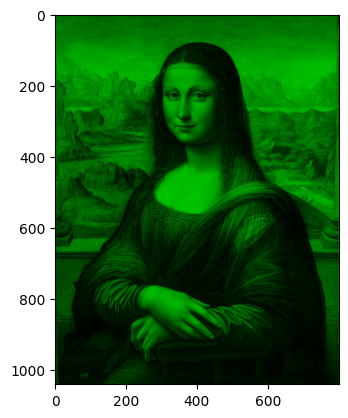

In [27]:
img_filename = "800px-Gioconda_(copia_del_Museo_del_Prado_restaurada).jpg" # Establecer el nombre del archivo de la imagen
monalisa = cv2.imread(img_filename) # Leer la imagen
monalisa = cv2.cvtColor(monalisa, cv2.COLOR_BGR2RGB) # Convertir la imagen a RGB
print(monalisa.shape) # Imprimir las dimensiones de la imagen
monalisa[..., 0] = 0 # Establecer el canal rojo (primer canal,0) en 0
monalisa[..., 2] = 0 # Establecer el canal azul (tercer canal,2) en 0
plt.imshow(monalisa) # Mostrar la imagen en verge porque se apagaron el canal rojo y azul

(640, 640, 3)
(3, 640, 640)


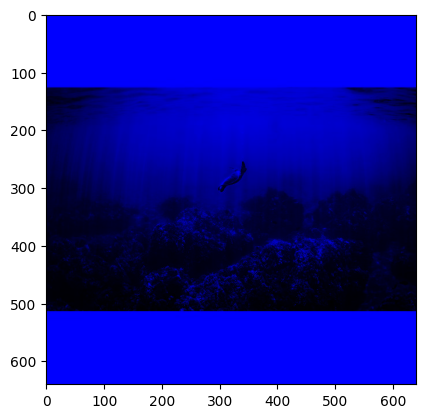

In [28]:
img_filename = osp.join(DATA_DIR, "images",'image_id_005_.jpg') # Establecer la ruta de la imagen
img1 = cv2.imread(img_filename) # Leer la imagen
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # Convertir la imagen a RGB
print(img1.shape) # Imprimir las dimensiones de la imagen
print(img1.transpose((2,0,1)).shape) # Imprimir las dimensiones de la imagen transpuesta
img1[..., 0] = 0 # Establecer el canal Rojo (primero canal, 0) en 0
img1[..., 1] = 0 # Establecer el canal Verde (segundo canal, 1) en 0
plt.imshow(img1) # Mostrar la imagen en azul, porque se apagó el rojo y verde.

# 15. Funciones para preprocesamiento de imágenes (tensores y albumentations)

In [29]:
class ToTensor(object): # Definir la clase ToTensor
    """Convert ndarrays in sample to Tensors.""" # Convertir matrices NumPy en tensores
    def __call__(self, sample): # Definir el método __call__
        image = sample['image'] # Obtener la imagen
        # swap color axis because # intercambiar el eje de color porque
        # numpy image: H x W x C (0,1,2) # imagen de numpy: H x W x C (0,1,2)
        # torch image: C x H x W # imagen de antorcha: C x H x W
        image = image.transpose((2, 0, 1)) # Cambiar el orden de los ejes de la imagen
        image = torch.from_numpy(image).float() # Convertir la imagen en un tensor de PyTorch
        sample.update({'image': image}) # Actualizar el diccionario con la imagen
        return sample # Devolver el diccionario

class Normalizer(object): # Definir la clase Normalizer

    def __init__(self, stds, means): # Definir el método __init__
        """
        Arguments: # Argumentos
            stds: array of length 3 containing the standard deviation of each channel in RGB order. # array de longitud 3 que contiene la desviación estándar de cada canal en orden RGB.
            means: array of length 3 containing the means of each channel in RGB order. # array de longitud 3 que contiene las medias de cada canal en orden RGB.
        """
        self.stds = stds # Establecer la desviación estándar
        self.means = means # Establecer la media

    def __call__(self, sample): # Definir el método __call__
        """
        Sample: a dicitonary containing: # Muestra: un diccionario que contiene:
            image: sample image in format (C, H, W) # imagen de muestra en formato (C, H, W)
        Returns: # Devoluciones:
            the image in (C, H, W) format with the channels normalized. # la imagen en formato (C, H, W) con los canales normalizados.
        """
        image = sample['image'] # Obtener la imagen

        for channel in range(3): # Iterar a través de los canales de la imagen
            image[channel] = (image[channel] - means[channel]) / stds[channel] # Normalizar los canales de la imagen

        sample['image'] = image # Actualizar el diccionario con la imagen
        return sample # Devolver el diccionario

class TVTransformWrapper(object): # Definir la clase TVTransformWrapper
    """Torch Vision Transform Wrapper # Envoltura de transformación de visión de antorcha
    """
    def __init__(self, transform: torch.nn.Module): # Definir el método __init__
        self.transform = transform # Establecer la transformación

    def __call__(self, sample): # Definir el método __call__
        sample['image'] = self.transform(sample['image']) # Aplicar la transformación a la imagen
        return sample

class AlbumentationsWrapper(object): # Definir la clase AlbumentationsWrapper
    def __init__(self, transform): # Definir el método __init__
        self.transform = transform # Establecer la transformación

    def __call__(self, sample): # Definir el método __call__
        transformed = self.transform( # Aplicar la transformación a la imagen
            image=sample['image'], # Obtener la imagen
            bboxes=sample['bbox'], # Obtener las cajas delimitadoras
            #category_ids=sample['class_id'] # Obtener las clases
        )

        sample['image'] = transformed['image'] # Actualizar el diccionario con la imagen
        sample['bbox'] = np.array(transformed['bboxes']) # Actualizar el diccionario con las cajas delimitadoras
        return sample # Devolver el diccionario

class Resizer(object): # Definir la clase Resizer
    """Resize the image in a sample to a given size.""" # Redimensionar la imagen en una muestra a un tamaño dado.
    def __init__(self, output_size): # Definir el método __init__
        assert isinstance(output_size, (int, tuple)) # Comprobar si el tamaño de salida es un entero o una tupla
        self.output_size = output_size # Establecer el tamaño de salida

    def __call__(self, sample): # Definir el método __call__
        image = sample['image'] # Obtener la imagen
        h, w = image.shape[:2] # Obtener la altura y el ancho de la imagen

        if isinstance(self.output_size, int): # Comprobar si el tamaño de salida es un entero
            if h > w: # Comprobar si la altura es mayor que el ancho
                new_h, new_w = self.output_size * h / w, self.output_size # Calcular la nueva altura y el nuevo ancho
            else: # La altura no es mayor que el ancho
                new_h, new_w = self.output_size, self.output_size * w / h # Calcular la nueva altura y el nuevo ancho
        else: # El tamaño de salida no es un entero
            new_h, new_w = self.output_size # Obtener la nueva altura y el nuevo ancho
        new_h, new_w = int(new_h), int(new_w) # Convertir la nueva altura y el nuevo ancho en enteros

        # Resize image # Redimensionar la imagen
        img = cv2.resize(image, (new_w, new_h)) # Redimensionar la imagen
        sample['image'] = img # Actualizar el diccionario con la imagen
        return sample # Devolver el diccionario

# 16. Funciones para Data_augmentations

In [30]:
common_transforms = [ # Definir las transformaciones comunes
    #Resizer(255),
    ToTensor(), # Convertir la imagen en un tensor
    Normalizer( # Normalizar la imagen
        means=means, # Establecer la media
        stds=stds, # Establecer la desviación estándar
    )
]

#Alfredo: modificar
train_data_augmentations = A.Compose([ # Definir las transformaciones de aumento de datos de entrenamiento
    #A.HorizontalFlip(p=1), # Voltear horizontalmente la imagen
    #A.Rotate(limit=(-20,20), p=0.5), # Rotar la imagen
    #A.Resize(height=255, width=255, p=1), # p=1 means always apply # Redimensionar la imagen,
    A.ToGray(p=0.25), # Convertir a escala de grises (Alvaro),
    A.RandomBrightnessContrast(p=0.5), #(Alvaro)
    A.HueSaturationValue(p=0.5) #(Alvaro)
    
    ],
    bbox_params=A.BboxParams( # Parámetros de la caja delimitadora
        format='albumentations', # Formato de la caja delimitadora
        label_fields=[],#'category_ids' # Campos de etiqueta
     )
)



train_transforms = torchvision.transforms.Compose( # Definir las transformaciones de entrenamiento
    [
        AlbumentationsWrapper(train_data_augmentations), # Envolver las transformaciones de aumento de datos de entrenamiento

  ] + common_transforms # Añadir las transformaciones comunes
)


#train_transforms = torchvision.transforms.Compose( # Definir las transformaciones de entrenamiento
            
#    common_transforms # Añadir las transformaciones comunes
#)


eval_transforms = torchvision.transforms.Compose(common_transforms) # Definir las transformaciones de evaluación

# Pregunta: ¿dónde puede ver cuántas imagenes se crearon, según Javier al menos 1.000 se deberían tener?
#R// Cuando realizas data augmentation usando librerías como Albumentations, generalmente las transformaciones se aplican en tiempo real, es decir, las imágenes aumentadas se crean durante el entrenamiento o la carga de datos y no se guardan de frma permanente en el disco ni se almacenan en el conjunto de datos.
# Para ver cuántas imágenes se procesaron con augmentations, puedes hacer un seguimiento dentro del bucle de entrenamiento.
# Hay una opción, que creo es recomendado para este ejercicio, y es generar nuevas imagenes e irlas guardando en una carpeta local que recomiendo en la siguiente fracción de codigo y comentarios (debe ajustarse a este ejercicio)

'''
la forma de responder esta inquietud guardando (en disco) en una carpeta las imágenes transformadas y así mismo creando un archivo que guarde la clasificación y los bboxes. Al final debe guardarse las imágenes originales y transformadas en una sola carpeta como también debe concatenarse con el archivo original con los datos de clasificación y bboxes con el correspondiente a las imágenes transformadas.
En el siguiente código se muestra como agregar una vez la configuración de las transformaciones
#
common_transforms = [ Normalizer( means=means, stds=stds, ) ]
train_data_augmentations1 = A.Compose([## incluir las transformaciones pertinentes## ], bbox_params=A.BboxParams( format='albumentations', label_fields=[] ) )
train_transforms = torchvision.transforms.Compose( [ AlbumentationsWrapper(train_data_augmentations1), ])
#
os.mkdir('data_final')
#

shutil.rmtree('data_final')
os.mkdir('data_final')
train_ds_da = CarsDataset(df, root_dir=train_root_dir)
last_index = max(train_ds_da.df.filename.apply(lambda x: int(x.replace('img_', '').replace('.jpg', ''))))
index = last_index + 1
iterador = iter(train_ds_da)
rows = []

for i in range(len(train_ds_da)): x = next(iterador) x_transformed = copy.deepcopy(x) x_transformed = train_transforms(x_transformed) filename = f"img_{index}.jpg" #image = cv2.cvtColor(x_transformed['image'],cv2.COLOR_RGB2GRAY) cv2.imwrite("data_final/"+filename, x_transformed['image']) #row = [filename, *x_transformed["class_id"].map(id2obj), *x_transformed['bbox'].squeeze()] row = [filename, *x_transformed["class_id"], *x_transformed['bbox'].squeeze()] rows.append(row) index+=1
aug_df = pd.DataFrame(rows, columns=['filename', 'xmin', 'ymin', 'xmax', 'ymax','class'])
aug_df["class"]=aug_df["class"].map(id2obj)
aug_df[['xmin', 'ymin', 'xmax', 'ymax']]*=h

#
A esta carpeta creada con las imágenes sintéticas se agregan las originales para tener todo en una sola carpeta
source = train_root_dir
destination = 'data_final'
gather all files
allfiles = os.listdir(source)

iterate on all files to move them to destination folder
for f in allfiles: src_path = os.path.join(source, f) dst_path = os.path.join(destination, f) shutil.copy(src_path, dst_path)
#

dataframe_with_dataaugmentation = pd.concat([df, aug_df], ignore_index=True)
dataframe_with_dataaugmentation

La nueva base generada "dataframe_with_dataaugmentation" debe particionarse (split) para el entrenamiento
'''

/opt/conda/lib/python3.10/site-packages/albumentations/core/composition.py:191: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


'\nla forma de responder esta inquietud guardando (en disco) en una carpeta las imágenes transformadas y así mismo creando un archivo que guarde la clasificación y los bboxes. Al final debe guardarse las imágenes originales y transformadas en una sola carpeta como también debe concatenarse con el archivo original con los datos de clasificación y bboxes con el correspondiente a las imágenes transformadas.\nEn el siguiente código se muestra como agregar una vez la configuración de las transformaciones\n#\ncommon_transforms = [ Normalizer( means=means, stds=stds, ) ]\ntrain_data_augmentations1 = A.Compose([## incluir las transformaciones pertinentes## ], bbox_params=A.BboxParams( format=\'albumentations\', label_fields=[] ) )\ntrain_transforms = torchvision.transforms.Compose( [ AlbumentationsWrapper(train_data_augmentations1), ])\n#\nos.mkdir(\'data_final\')\n#\n\nshutil.rmtree(\'data_final\')\nos.mkdir(\'data_final\')\ntrain_ds_da = CarsDataset(df, root_dir=train_root_dir)\nlast_index =

# 17. Prueba de data_augmentations

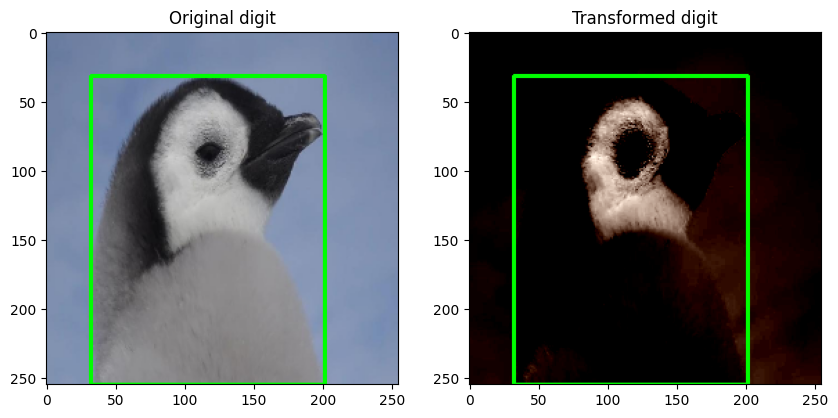

In [31]:
train_ds = imageDataset(train_df, root_dir=train_root_dir,output_size=(255,255)) # Crear el conjunto de datos de entrenamiento
x = next(iter(train_ds)) # Obtener la primera imagen del conjunto de datos de entrenamiento
x_transformed = copy.deepcopy(x) # Copiar la imagen
x_transformed = train_transforms(x_transformed) # Aplicar las transformaciones a la imagen
original_img = x['image'] # Obtener la imagen original
transformed_img = x_transformed['image'].numpy().transpose(1, 2, 0) # Obtener la imagen transformada
transformed_img = cv2.resize(transformed_img, (255,255)) ## Redimensiona la imagen # Redimensionar la imagen
original_img = draw_bbox( # Dibujar la caja delimitadora en la imagen original
    original_img, # La imagen original
    normalize_bbox(x['bbox'].squeeze()), # La caja delimitadora normalizada
    (0, 255, 0) # El color de la caja delimitadora
)

transformed_img = draw_bbox( # Dibujar la caja delimitadora en la imagen transformada
    transformed_img, # La imagen transformada
    normalize_bbox(x_transformed['bbox'].squeeze()), # La caja delimitadora normalizada
    (0, 255, 0) # El color de la caja delimitadora
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) # Crear una figura de Matplotlib
axes[0].imshow(original_img) # Mostrar la imagen original
axes[0].set_title('Original digit') # Establecer el título de la imagen original
axes[1].imshow(transformed_img) # Mostrar la imagen transformada
axes[1].set_title('Transformed digit') #    Establecer el título de la imagen transformada
plt.show() # Mostrar la figura

#Pregunta: ¿qué hizo que la imagen transformada quedará negra? R/ es solo porque se esta ingresando una imagen que está transformada y finaliza con con una normalización, por lo que los valores de los pixeles estan trasnformados, pero esto no afecta el entrenamiento

In [32]:
original_img.shape

(255, 255, 3)

# 18. DataLoader (ejemplo, minientrenamiento)

Un DataLoader es una herramienta especializada para la carga y el procesamiento de datos en el contexto del aprendizaje profundo, por ejemplo análisis de imágenes.

In [33]:
#Ejemplo de dataloader.
train_ds = imageDataset(df, root_dir=train_root_dir, transform=train_transforms,output_size=(255,255)) # Crear el conjunto de datos de entrenamiento
train_data = torch.utils.data.DataLoader(train_ds, batch_size=16) # Crear un DataLoader para el conjunto de datos de entrenamiento

#Alfredo: ¿cambiar el batch_size? aqui no, es solo para el ejemplo, o si quieres ver mas datos, lo pueden hacer
#Pregunta: ¿se cambia el batch_size, por qúe vuelvo a crear un DataLoader? R// lo pusimos de 16 solo para el ejemplo y poder mostrar la salida de estas 16 imagenes

for x in train_data: # Iterar a través de los datos de entrenamiento
    print(x['image'].size()) # Imprimir el tamaño de la imagen
    break # Salir del bucle

torch.Size([16, 3, 255, 255])


In [34]:
#Imprimimos el tamaño de traind_ds y train_data
print("len train_ds", len(train_ds))
print("len train_data", len(train_data))

len train_ds 474
len train_data 30


# 19. Arquitectura del modelo (backbone, cabeza regresión y clasificación)

In [35]:
'''
#Alfredo: cambiar
#Pregunta: por qué vuelo a crear otro modelo?// No entiendo

def get_output_shape(model: nn.Sequential, image_dim: ty.Tuple[int, int, int]): # Definir la función get_output_shape
    return model(torch.rand(*(image_dim)).to(device)).data.shape # Obtener la forma de la salida del modelo

class Model(nn.Module): # Definir la clase Model
    def __init__(self, input_shape: ty.Tuple[int, int, int] = (3, 255, 255), n_classes: int = 2): # Definir el método __init__
        """
        Model with one input (image) and two outputs: # Modelo con una entrada (imagen) y dos salidas:
            1. Digit classification (classification). # Clasificación de dígitos (clasificación).
            2. Bounding box prediction (regression). # Predicción de la caja delimitadora (regresión).

        Arguments:
            input_shape: input shape of the image in format (C, H, W) # forma de entrada de la imagen en formato (C, H, W)
            n_classes: number of classes to perfrom classification with # número de clases para realizar la clasificación

        Attributes:
            backbone: ConvNet that process the image and # ConvNet que procesa la imagen y
            returns a flattened vector with the information of the activation # devuelve un vector aplanado con la información de las activaciones.
            cls_head: MLP that receives the flattened input from the backbone # MLP que recibe la entrada aplanada de la columna vertebral
            and predicts the classification logits for the classes (classficiation task). # y predice los logits de clasificación para las clases (tarea de clasificación).
            reg_head: MLP that receives the flattened input from the backbone # MLP que recibe la entrada aplanada de la columna vertebral
            and predicts the coordinates of the predicted bounding box (regression task). # y predice las coordenadas de la caja delimitadora predicha (tarea de regresión).
        """
        super().__init__() # Inicializar la clase base
        self.input_shape = input_shape # Establecer la forma de entrada
        # When doing transfer learning, use pretrained model instead of custom backbone # Al hacer transfer learning, use el modelo preentrenado en lugar de la columna vertebral personalizada
        self.backbone = pretrained_model # Establecer la columna vertebral
        backbone_output_shape = get_output_shape(self.backbone, [1, *input_shape]) # Obtener la forma de salida de la columna vertebral
        backbone_output_features = reduce(lambda x, y: x*y, backbone_output_shape) # Obtener las características de salida de la columna vertebral

       #Pregunta: por qué no se hizo esta en el numeral 12 del transfer Learning R//No entiendo
        self.cls_head = nn.Sequential(  # Establecer la cabeza de clasificación
            nn.Linear(in_features=backbone_output_features, out_features=768), # Capa lineal #Pregunta: ¿por que 768?, por qúe en clase se dijo 1000 en in features? 
            #R//Lo que se dijo en la clase fue que el modelo preentrenado vgg16 trata de predecir 1000 clases, aqui solo estamos prediciendo 2 clases. Por otro lado, el tamaño 768 no es obligatorio y puede variar según el diseño del modelo o la estructura de salida del backbone. En este caso, 768 es un tamaño suficientemente grande para retener información de características ricas antes de reducirlas en las capas siguientes.
            nn.ReLU(), # Función de activación ReLU
            nn.Linear(768, 256), # Capa lineal #Pregunta: ¿por qué 256? R// Igual que el 768, no es un valor que sea obligatorio, hace parte de la construcción de la arquitectura, el uso de 256 aquí ayuda a reducir la dimensionalidad de la representación de 768 a un tamaño más pequeño, antes de llegar a la última capa que predice las clases finales. Esta reducción de dimensión ayuda a simplificar el modelo, manteniendo suficiente capacidad para capturar características relevantes. Si se fijan, para la tarea de regresión hay una reducción adicional a 128.
            nn.ReLU(), # Función de activación ReLU
            nn.Linear(256, n_classes)   # Capa lineal.  n_classes es 2 porque es clasificación de pingüino o tortuga. Esta variable se definió más arriba.

        )

        self.reg_head = nn.Sequential(  # Establecer la cabeza de regresión
            nn.Linear(in_features=backbone_output_features, out_features=768), # Capa lineal
            nn.ReLU(),  # Función de activación ReLU
            nn.Linear(768, 256), # Capa lineal
            nn.ReLU(), # Función de activación ReLU
            nn.Linear(256, 128), # Capa lineal
            nn.ReLU(), # Función de activación ReLU
            nn.Linear(128, 4)   # Capa lineal.  Esta capa termina en 4 porque son 4 coordenadas las que hay predecir (x min, x max, y min,y max).
        )

    def forward(self, x: Tensor) -> ty.Dict[str, Tensor]: # Definir el método forward
        features = self.backbone(x)     # Extraer las características de la imagen
        cls_logits = self.cls_head(features) # Predecir los logits de clasificación
        pred_bbox = self.reg_head(features)     # Predecir la caja delimitadora
        predictions = {'bbox': pred_bbox, 'class_id': cls_logits}  # Devolver las predicciones
        return predictions # Devolver las predicciones
'''

'\n#Alfredo: cambiar\n#Pregunta: por qué vuelo a crear otro modelo?// No entiendo\n\ndef get_output_shape(model: nn.Sequential, image_dim: ty.Tuple[int, int, int]): # Definir la función get_output_shape\n    return model(torch.rand(*(image_dim)).to(device)).data.shape # Obtener la forma de la salida del modelo\n\nclass Model(nn.Module): # Definir la clase Model\n    def __init__(self, input_shape: ty.Tuple[int, int, int] = (3, 255, 255), n_classes: int = 2): # Definir el método __init__\n        """\n        Model with one input (image) and two outputs: # Modelo con una entrada (imagen) y dos salidas:\n            1. Digit classification (classification). # Clasificación de dígitos (clasificación).\n            2. Bounding box prediction (regression). # Predicción de la caja delimitadora (regresión).\n\n        Arguments:\n            input_shape: input shape of the image in format (C, H, W) # forma de entrada de la imagen en formato (C, H, W)\n            n_classes: number of classes 

In [36]:
def get_output_shape(model: nn.Sequential, image_dim: ty.Tuple[int, int, int]): 
    return model(torch.rand(*(image_dim)).to(device)).data.shape

class Model(nn.Module): 
    def __init__(self, input_shape: ty.Tuple[int, int, int] = (3, 255, 255), n_classes: int = 2): 
        """
        Modelo con una entrada (imagen) y dos salidas:
            1. Clasificación de dígitos (tarea de clasificación).
            2. Predicción de la caja delimitadora (tarea de regresión).
        """
        super().__init__()
        self.input_shape = input_shape
        self.backbone = pretrained_model  # Usamos VGG-16 como backbone
        backbone_output_shape = get_output_shape(self.backbone, [1, *input_shape]) 
        backbone_output_features = reduce(lambda x, y: x*y, backbone_output_shape)

        # Cabeza de clasificación (classification head)
        self.cls_head = nn.Sequential(
            nn.Linear(in_features=backbone_output_features, out_features=1024),  # Capa lineal
            nn.ReLU(),  # Activación ReLU
         #   nn.Dropout(0.5),  # Regularización Dropout
            nn.Linear(1024, 512),  # Reducción a 512 neuronas
            nn.ReLU(),  # Activación ReLU
         #   nn.Dropout(0.5),  # Regularización Dropout
            nn.Linear(512, 256),  # Reducción a 256
            nn.ReLU(),  # Activación ReLU
            nn.Linear(256, n_classes)  # 2 clases de clasificación
        )

        # Cabeza de regresión (bounding box prediction head)
        self.reg_head = nn.Sequential(
            nn.Linear(in_features=backbone_output_features, out_features=512),  # Capa lineal
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 4)  # Predicción de 4 coordenadas del bounding box
        )

    def forward(self, x: Tensor) -> ty.Dict[str, Tensor]:
        features = self.backbone(x)  # Extraer características del backbone
        cls_logits = self.cls_head(features)  # Predicción de clasificación
        pred_bbox = self.reg_head(features)  # Predicción del bounding box
        predictions = {'bbox': pred_bbox, 'class_id': cls_logits}  # Devolver las predicciones
        return predictions

# 20. Predicciones

In [37]:
torch.cuda.empty_cache() # Vaciar la memoria caché de CUDA

In [38]:
print('image', x['image'].size())   # Imprimir el tamaño de la imagen
model = Model(input_shape=(3, 255, 255), n_classes=2).to(device) # Crear una instancia del modelo y moverla al dispositivo
x['image'] = x['image'].to(device) # Mover la imagen al dispositivo
preds = model(x['image'])  # Obtener las predicciones
preds # Mostrar las predicciones
#Pregunta: ¿de dónde sale el tamaño del tensor, por qué 16? R// Corresponde al numero de imagenes que ingresaron a este "minientrenamiento", ver punto 18. DataLoader -> train_data = torch.utils.data.DataLoader(train_ds, batch_size=16)

image torch.Size([16, 3, 255, 255])


{'bbox': tensor([[-0.1358, -0.0443,  0.0685,  0.0365],
         [-0.1147, -0.0323,  0.0829, -0.0117],
         [-0.1253, -0.0323,  0.0713,  0.0211],
         [-0.1069, -0.0369,  0.0424, -0.0218],
         [-0.1135,  0.0220,  0.1171,  0.0118],
         [-0.0973,  0.0046,  0.0807, -0.0119],
         [-0.1301, -0.0167,  0.0682, -0.0162],
         [-0.1060, -0.0431,  0.0791,  0.0130],
         [-0.1352, -0.0133,  0.0892, -0.0060],
         [-0.1094, -0.0020,  0.0802,  0.0017],
         [-0.1416,  0.0027,  0.0766, -0.0147],
         [-0.1228, -0.0560,  0.0744, -0.0337],
         [-0.0960, -0.0107,  0.1204, -0.0234],
         [-0.0763, -0.0476,  0.0535, -0.0126],
         [-0.0917,  0.0041,  0.1321, -0.0573],
         [-0.1388, -0.0446,  0.0843,  0.0030]], device='cuda:0',
        grad_fn=<AddmmBackward0>),
 'class_id': tensor([[-0.0485,  0.0583],
         [-0.0636,  0.0405],
         [-0.0577,  0.0273],
         [-0.0504,  0.0605],
         [-0.0176,  0.0419],
         [-0.0143,  0.0305],
 

# 21. Funciones de métricas de evaluación del modelo

In [39]:
#IOU Intersection over Union (Intersección sobre Unión) 
def iou(y_true: Tensor, y_pred: Tensor): # Definir la función iou
    pairwise_iou = torchvision.ops.box_iou(y_true.squeeze(), y_pred.squeeze()) # Calcular la intersección sobre la unión
    result = torch.trace(pairwise_iou) / pairwise_iou.size()[0] # Calcular el IoU
    return result   # Devolver el IoU

In [40]:
#Accuracy
def accuracy(y_true: Tensor, y_pred: Tensor): # Definir la función accuracy
    pred = torch.argmax(y_pred, axis=-1) # Obtener la clase predicha
    y_true = y_true.squeeze() # Reducir las dimensiones de la clase verdadera
    correct = torch.eq(pred, y_true).float() # Calcular las predicciones correctas
    total = torch.ones_like(correct) # Calcular el total de predicciones
    result = torch.divide(torch.sum(correct), torch.sum(total))     # Calcular la precisión
    return result # Devolver la precisión

# 22. Loss fn

In [41]:
# Pregunta: el modelo estaba prediciendo sin una función de loss?
def loss_fn(y_true, y_preds, alpha: float = 0.5): # Definir la función loss_fn
    cls_y_true, cls_y_pred = y_true['class_id'].long(), y_preds['class_id'].float().unsqueeze(-1)   # Obtener las clases verdaderas y predichas
    reg_y_true, reg_y_pred = y_true['bbox'].float().squeeze(), y_preds['bbox'].float().squeeze() # Obtener las cajas delimitadoras verdaderas y predichas
    cls_loss = F.cross_entropy(cls_y_pred, cls_y_true)  # Calcular la pérdida de clasificación
    reg_loss = F.mse_loss(reg_y_pred, reg_y_true) # Calcular la pérdida de regresión
    # Adds weights to both tasks
    total_loss = (1 - alpha) * cls_loss + alpha * reg_loss # Calcular la pérdida total
    return dict(loss=total_loss, reg_loss=reg_loss,cls_loss=cls_loss) # Devolver la pérdida total

# 23. Callbacks (impresiones de ejecución del modelo en las iteraciones de optimización)

In [42]:
'''def printer(logs: ty.Dict[str, ty.Any]): # Definir la función printer
    # print every 10 steps  # Imprimir cada 10 pasos
    if logs['iters'] % 10 != 0: # Comprobar si el número de iteraciones no es divisible por 10
        return # Salir de la función
    print('Iteration #: ',logs['iters'])    # Imprimir el número de iteraciones
    for name, value in logs.items(): # Iterar a través de los elementos en el diccionario
        if name == 'iters': # Comprobar si el nombre es 'iters'
            continue # Saltar la iteración
        if type(value) in [float, int]: # Comprobar si el valor es un flotante o un entero
            value = round(value, 4) # Redondear el valor
        elif type(value) is torch.Tensor:   # Comprobar si el valor es un tensor de PyTorch
            value = torch.round(value, decimals=4) # Redondear el valor
        print(f'\t{name} = {value}') # Imprimir el nombre y el valor
    print() # Imprimir una línea en blanco '''

#Se ajusta este código para grabar los resultados del entrenamiento y graficar.
# Crear una lista global para almacenar los registros

logs_list = []
def printer(logs: ty.Dict[str, ty.Any]):
    global logs_list
    # Imprimir cada 10 pasos
    if logs['iters'] % 10 != 0:
    #if logs['iters'] % 100 != 0:
          return
    
    # Crear un diccionario para almacenar los valores de esta iteración
    log_entry = {'iters': logs['iters']}

    # Imprimir y guardar cada valor en log_entry
    print('Iteration #: ', logs['iters'])

    for name, value in logs.items():
        if name == 'iters':
            continue
        if isinstance(value, (float, int)):
            value = round(value, 4)
        elif isinstance(value, torch.Tensor):
            value = torch.round(value, decimals=4).item()  # Convertir el tensor a un número flotante
        # Añadir el valor al diccionario de la entrada actual
        log_entry[name] = value
        print(f'\t{name} = {value}')
    # Añadir la entrada actual a la lista de registros
    logs_list.append(log_entry)

# 24. Training loop (FeedForward, Backpropagation)

In [43]:
def evaluate( # Definir la función evaluate
    logs: ty.Dict[str, ty.Any],     # Diccionario con los registros
    labels: ty.Dict[str, Tensor],  # Diccionario con las etiquetas
    preds: ty.Dict[str, Tensor],  # Diccionario con las predicciones
    eval_set: str, # Conjunto de evaluación
    metrics: ty.Dict[str, ty.Callable[[Tensor, Tensor], Tensor]], # Métricas
    losses: ty.Optional[ty.Dict[str, Tensor]] = None, # Pérdidas
) -> ty.Dict[str, ty.Any]: # Devolver un diccionario con los registros

    if losses is not None: # Comprobar si las pérdidas no son nulas
        for loss_name, loss_value in losses.items():    # Iterar a través de los nombres y valores de las pérdidas
            logs[f'{eval_set}_{loss_name}'] = loss_value # Añadir las pérdidas al diccionario de registros

    for task_name, label in labels.items():  # Iterar a través de los nombres de las tareas y las etiquetas
        for metric_name, metric in metrics[task_name]: # Iterar a través de los nombres y métricas de las tareas
            value = metric(label, preds[task_name]) # Calcular la métrica
            logs[f'{eval_set}_{metric_name}'] = value # Añadir la métrica al diccionario de registros
    return logs # Devolver los registros


def step( # Definir la función step
    model: Model, # Modelo
    optimizer: Optimizer, # Optimizador
    batch: imageDataset, # Lote
    loss_fn: ty.Callable[[ty.Dict[str, torch.Tensor]], torch.Tensor], # Función de pérdida
    device: str, # Dispositivo
    train: bool = False, # Entrenar
) -> ty.Tuple[ty.Dict[str, Tensor], ty.Dict[str, Tensor]]:  # Devolver un par de diccionarios con tensores

    if train: # Comprobar si se está entrenando
        optimizer.zero_grad()   # Reiniciar los gradientes

    #img = batch['image'].to(device) # Obtener la imagen
    img = batch.pop('image').to(device) # Obtener la imagen

    for k in list(batch.keys()): # Iterar a través de las claves en el lote
        batch[k] = batch[k].to(device) # Mover las claves al dispositivo

    preds = model(img.float()) # Obtener las predicciones
    losses = loss_fn(batch, preds) # Calcular las pérdidas
    final_loss = losses['loss'] #   Obtener la pérdida final

    if train: # Comprobar si se está entrenando
        final_loss.backward() # Retropropagar la pérdida
        optimizer.step() # Actualizar los pesos
    return losses, preds # Devolver las pérdidas y las predicciones

def train( # Definir la función train
    model: Model, # Modelo
    optimizer: Optimizer, # Optimizador
    dataset: DataLoader, # Conjunto de datos
    eval_datasets: ty.List[ty.Tuple[str, DataLoader]], # Conjuntos de datos de evaluación
    loss_fn: ty.Callable[[ty.Dict[str, torch.Tensor]], torch.Tensor], # Función de pérdida
    metrics: ty.Dict[str, ty.Callable[[Tensor, Tensor], Tensor]], # Métricas
    callbacks: ty.List[ty.Callable[[ty.Dict[ty.Any, ty.Any]], None]], # Devoluciones de llamada
    device: str, # Dispositivo
  
    #Pregunta:¿estas son las épocas?
    #Pregunta:¿de dónde sale este valor?
  
   
    train_steps: 100, # Pasos de entrenamiento #Alfredo: ¿se debe cambiar?
    #train_steps: 500, # Pasos de entrenamiento #Alfredo: ¿se debe cambiar? (Alvaro)
    eval_steps: 10, # Pasos de evaluación #Alfredo: ¿se dbe cambiar?

) -> Model: # Devolver el modelo
    # Send model to device (GPU or CPU) # Enviar el modelo al dispositivo (GPU o CPU)
    model = model.to(device) # Mover el modelo al dispositivo
    iters = 0 # Inicializar el número de iteraciones
    iterator = iter(dataset) # Crear un iterador para el conjunto de datos
    assert train_steps > eval_steps, 'Train steps should be greater than the eval steps' # Comprobar si los pasos de entrenamiento son mayores que los pasos de evaluación

    while iters <= train_steps: # Iterar hasta que el número de iteraciones sea menor o igual que los pasos de entrenamiento
        logs = dict() # Inicializar el diccionario de registros
        logs['iters'] = iters # Añadir el número de iteraciones al diccionario de registros
        try: # Intentar
            batch = next(iterator) # Obtener el siguiente lote
        except StopIteration: # Capturar la excepción StopIteration
            iterator = iter(dataset) # Crear un nuevo iterador para el conjunto de datos
            batch = next(iterator) # Obtener el siguiente lote
        # Send batch to device # Enviar el lote al dispositivo
        losses, preds = step(model, optimizer, batch, loss_fn, device, train=True) # Realizar un paso
        logs = evaluate(logs, batch, preds, 'train', metrics, losses) # Evaluar

        # Eval every eval_steps iterations # Evaluar cada eval_steps iteraciones
        if iters % eval_steps == 0: # Comprobar si el número de iteraciones es divisible por eval_steps
            # Evaluate # Evaluar
            # Deactives layers that only needed to train # Desactiva las capas que solo se necesitan para entrenar
            # https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615 # https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615
            model.eval() # Poner el modelo en modo de evaluación
            
            # Avoids calculating gradients in evaluation dataset. # Evita calcular gradientes en el conjunto de datos de evaluación.
            with torch.no_grad(): # Evitar el cálculo de gradientes
                for name, dataset in eval_datasets: # Iterar a través de los conjuntos de datos de evaluación
                    for batch in dataset: # Iterar a través de los lotes en el conjunto de datos de evaluación
                        losses, preds = step(model, optimizer, batch, loss_fn, device, train=False) # Realizar un paso
                        logs = evaluate(logs, batch, preds, name, metrics, losses) # Evaluar

        for callback in callbacks: # Iterar a través de las devoluciones de llamada
            callback(logs) #    Llamar a la devolución de llamada
        iters += 1 # Incrementar el número de iteraciones

    return model # Devolver el modelo

# 25. Cargar el modelo

In [44]:
# Hiperparámetros

#Alfredo: cambiar?
#batch_size = 16 # Tamaño del lote
batch_size = 16 # Tamaño del lote
lr = 0.001 # Tasa de aprendizaje (learning rate)
#lr = 0.005 # Tasa de aprendizaje (learning rate)
#lr = 0.004 # Tasa de aprendizaje (learning rate)
#lr = 0.01 # Tasa de aprendizaje (learning rate)

# Data
train_ds = imageDataset(train_df, root_dir=train_root_dir, transform=train_transforms,output_size=(255,255)) # Crear el conjunto de datos de entrenamiento
val_ds = imageDataset(val_df, root_dir=train_root_dir, transform=eval_transforms,output_size=(255,255)) # Crear el conjunto de datos de validación
train_data = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=cpu_count()) # Crear un DataLoader para el conjunto de datos de entrenamiento
val_data = DataLoader(val_ds, batch_size=batch_size, num_workers=cpu_count()) # Crear un DataLoader para el conjunto de datos de validación

#Pregunta: ¿por que se una un batch size aquí?

# Model
model = Model().to(device) # Crear una instancia del modelo y moverla al dispositivo 
#Pregunta: qué modelo grabó aquí, por qúe otra vez hace feature extractor?
#Pregunta: '¿cómo se calculan los parámetros de la capa lineal?
#Pregunta: ¿por qué el vector de salida tendrá 516 parámetros, entrada de 128 parámetros, que es 128?
#Pregunta: ¿por qúe la última capa no es una función de activación? R// 
summary(model, model.input_shape) # Resumir el modelo

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 255, 255]           1,792
              ReLU-2         [-1, 64, 255, 255]               0
            Conv2d-3         [-1, 64, 255, 255]          36,928
              ReLU-4         [-1, 64, 255, 255]               0
         MaxPool2d-5         [-1, 64, 127, 127]               0
            Conv2d-6        [-1, 128, 127, 127]          73,856
              ReLU-7        [-1, 128, 127, 127]               0
            Conv2d-8        [-1, 128, 127, 127]         147,584
              ReLU-9        [-1, 128, 127, 127]               0
        MaxPool2d-10          [-1, 128, 63, 63]               0
           Conv2d-11          [-1, 256, 63, 63]         295,168
             ReLU-12          [-1, 256, 63, 63]               0
           Conv2d-13          [-1, 256, 63, 63]         590,080
             ReLU-14          [-1, 256,

# 26. Entrenar y optimizar el modelo

In [45]:
# Optimizer # Optimizador
optimizer = torch.optim.Adam(lr=lr, params=model.parameters()) # Crear un optimizador

#Alfredo: ¿cambiar el optimizador?
for epoch in range(12):
    model = train( # Entrenar el modelo
        model, # Modelo
        optimizer, # Optimizador
        train_data, # Conjunto de datos de entrenamiento
        eval_datasets=[('val', val_data)], # Conjuntos de datos de evaluación
        loss_fn=loss_fn, # Función de pérdida
        metrics={ # Métricas
            'bbox': [('iou', iou)], # Métricas de la caja delimitadora
            'class_id': [('accuracy', accuracy)] # Métricas de la clase
        },
    
        callbacks=[printer], # Devoluciones de llamada
        device=device, # Dispositivo
        train_steps=100, # Pasos de entrenamiento #Alfredo: ponernos de acuerdo en esta parte
        eval_steps=10 # Pasos de evaluación  #Alfredo: ponernos de acuerdo en esta parte
    )



Iteration #:  0
	train_loss = 0.5501999855041504
	train_reg_loss = 0.40130001306533813
	train_cls_loss = 0.6991000175476074
	train_iou = 0.0
	train_accuracy = 0.5
	val_loss = 519.6873168945312
	val_reg_loss = 1038.2864990234375
	val_cls_loss = 1.0881999731063843
	val_iou = 0.0
	val_accuracy = 0.7142999768257141
Iteration #:  10
	train_loss = 1.0879000425338745
	train_reg_loss = 1.3554999828338623
	train_cls_loss = 0.8202999830245972
	train_iou = 0.0
	train_accuracy = 0.625
	val_loss = 0.7993000149726868
	val_reg_loss = 0.9811000227928162
	val_cls_loss = 0.6175000071525574
	val_iou = 0.0
	val_accuracy = 0.7142999768257141
Iteration #:  20
	train_loss = 0.3625999987125397
	train_reg_loss = 0.045499999076128006
	train_cls_loss = 0.6797999739646912
	train_iou = 0.2265
	train_accuracy = 0.5625
	val_loss = 0.5
	val_reg_loss = 0.37869998812675476
	val_cls_loss = 0.6212000250816345
	val_iou = 0.0233
	val_accuracy = 0.8571000099182129
Iteration #:  30
	train_loss = 0.37310001254081726
	train_re

In [46]:
print('image', x['image'].size())   # Imprimir el tamaño de la imagen

image torch.Size([16, 3, 255, 255])


In [47]:
#Imprimimos el tamaño de traind_ds y train_data
print("len train_ds", len(train_ds))
print("len train_data", len(train_data))

len train_ds 355
len train_data 23


In [48]:
model.parameters() # Mostrar los parámetros del modelo
# Pregunta:  aquí no se ve nada
# Mostrar los parámetros del modelo
#for name, param in model.named_parameters():
#    if param.requires_grad:  # Solo mostrar parámetros que se están entrenando
#        print(f"Nombre: {name}, Forma: {param.data.shape}, Valor: {param.data}")

<generator object Module.parameters at 0x7e6dfc0c2650>

In [49]:
# Función para convertir los resultados del entrenamiento de la red en un DataFrame
def get_logs_dataframe():
    return pd.DataFrame(logs_list)
df_logs = get_logs_dataframe()
df_logs = df_logs[df_logs['iters'] == 100].reset_index(drop=True)
df_logs

,iters,train_loss,train_reg_loss,train_cls_loss,train_iou,train_accuracy,val_loss,val_reg_loss,val_cls_loss,val_iou,val_accuracy
0,100,0.3856,0.0472,0.7240,0.2867,0.3750,0.3426,0.0326,0.6526,0.2792,0.7143
1,100,0.3816,0.0495,0.7137,0.2761,0.3750,0.3515,0.0500,0.6530,0.2780,0.7143
2,100,0.3769,0.0387,0.7150,0.3197,0.3750,0.3444,0.0428,0.6461,0.2920,0.7143
3,100,0.3707,0.0323,0.7092,0.3324,0.4375,0.3353,0.0493,0.6213,0.2625,0.7143
4,100,0.3698,0.0298,0.7097,0.3345,0.4375,0.3074,0.0357,0.5790,0.2816,0.7143
5,100,0.3392,0.0406,0.6378,0.2647,0.8125,0.3546,0.0368,0.6723,0.2271,0.5714
6,100,0.2438,0.0562,0.4314,0.1662,0.8750,0.2403,0.0335,0.4470,0.2914,0.8571
7,100,0.3092,0.0284,0.5901,0.2987,0.6875,0.4077,0.0375,0.7778,0.2496,0.2857
8,100,0.3540,0.0216,0.6864,0.3833,0.5000,0.3473,0.0290,0.6656,0.3406,0.7143
9,100,0.2641,0.0162,0.5120,0.4141,0.8125,0.2762,0.0258,0.5265,0.3315,0.8571


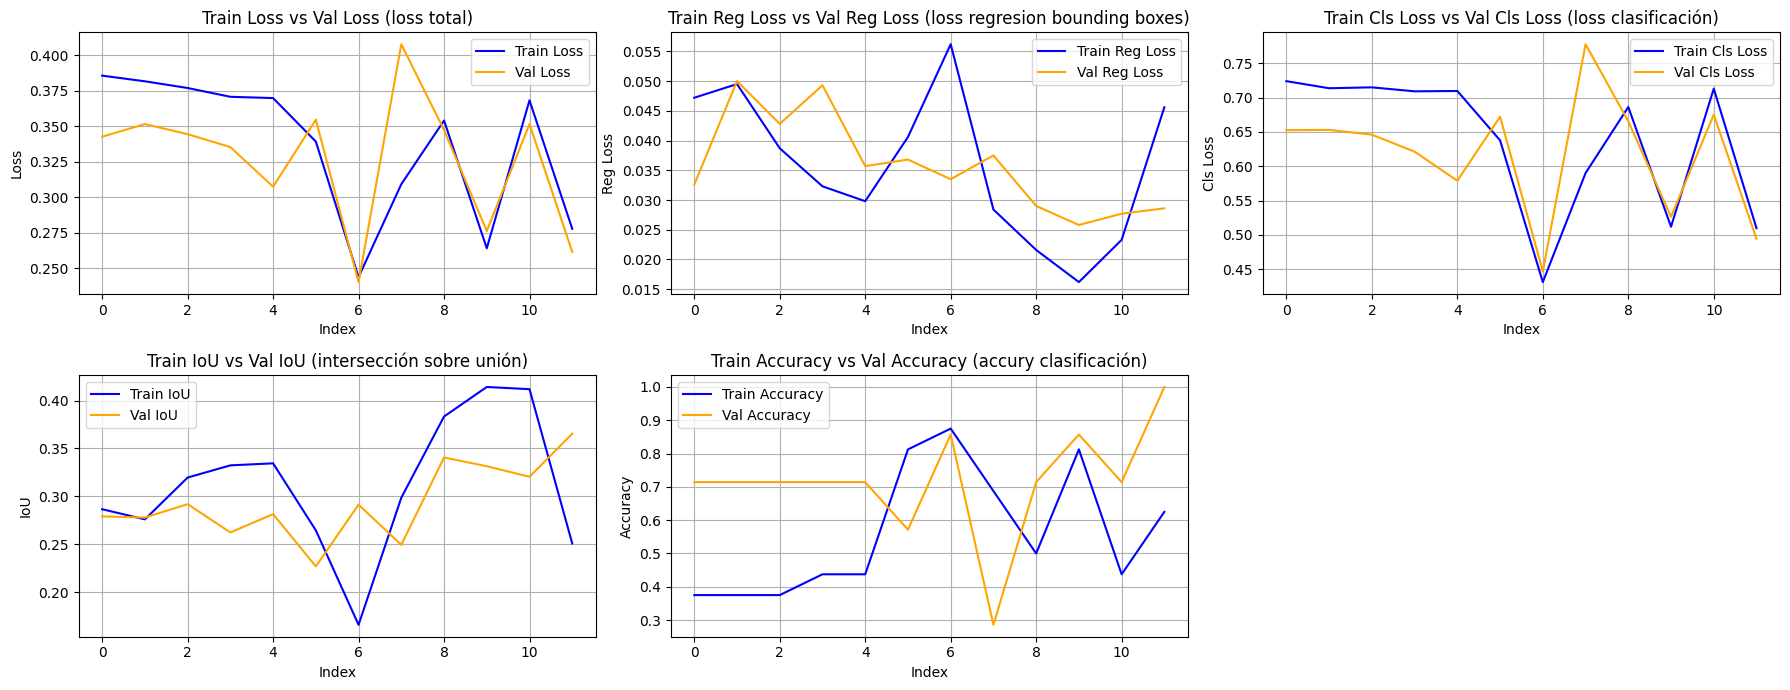

In [50]:
# Graficamos los resultados del entrenamiento de la red

# Configuración de la figura con 2 filas y 3 columnas
fig, axs = plt.subplots(2, 3, figsize=(18, 7))

# Gráfico 1: train_loss vs val_loss
axs[0, 0].plot(df_logs.index, df_logs['train_loss'], label='Train Loss', color='blue')
axs[0, 0].plot(df_logs.index, df_logs['val_loss'], label='Val Loss', color='orange')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Train Loss vs Val Loss (loss total)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Gráfico 2: train_reg_loss vs val_reg_loss
axs[0, 1].plot(df_logs.index, df_logs['train_reg_loss'], label='Train Reg Loss', color='blue')
axs[0, 1].plot(df_logs.index, df_logs['val_reg_loss'], label='Val Reg Loss', color='orange')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('Reg Loss')
axs[0, 1].set_title('Train Reg Loss vs Val Reg Loss (loss regresion bounding boxes)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Gráfico 3: train_cls_loss vs val_cls_loss
axs[0, 2].plot(df_logs.index, df_logs['train_cls_loss'], label='Train Cls Loss', color='blue')
axs[0, 2].plot(df_logs.index, df_logs['val_cls_loss'], label='Val Cls Loss', color='orange')
axs[0, 2].set_xlabel('Index')
axs[0, 2].set_ylabel('Cls Loss')
axs[0, 2].set_title('Train Cls Loss vs Val Cls Loss (loss clasificación)')
axs[0, 2].legend()
axs[0, 2].grid(True)

# Gráfico 4: train_iou vs val_iou
axs[1, 0].plot(df_logs.index, df_logs['train_iou'], label='Train IoU', color='blue')
axs[1, 0].plot(df_logs.index, df_logs['val_iou'], label='Val IoU', color='orange')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('IoU')
axs[1, 0].set_title('Train IoU vs Val IoU (intersección sobre unión)')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Gráfico 5: train_accuracy vs val_accuracy
axs[1, 1].plot(df_logs.index, df_logs['train_accuracy'], label='Train Accuracy', color='blue')
axs[1, 1].plot(df_logs.index, df_logs['val_accuracy'], label='Val Accuracy', color='orange')
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].set_title('Train Accuracy vs Val Accuracy (accury clasificación)')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Ocultar el último gráfico vacío (segunda fila, tercera columna)
axs[1, 2].axis('off')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

# 27.  Validación visual del modelo

In [51]:
num_imgs = 5 # Número de imágenes
ncols = 5 # Número de columnas
nrows = math.ceil(num_imgs / ncols) # Número de filas
start_idx = 0 # Índice de inicio

inference_ds = imageDataset(val_df.iloc[start_idx:start_idx+num_imgs], root_dir=train_root_dir,output_size=(255,255)) # Crear el conjunto de datos de inferencia
inference_data = DataLoader(inference_ds, batch_size=num_imgs, num_workers=1, shuffle=False) # Crear un DataLoader para el conjunto de datos de inferencia
inference_batch = next(iter(inference_data)) # Obtener el siguiente lote de datos de inferencia
inference_imgs = np.empty((num_imgs, 3, 255, 255)) # Crear un array vacío para las imágenes de inferencia

transform = eval_transforms # Transformaciones de evaluación

for i, img in enumerate(inference_batch['image']): # Iterar a través de las imágenes en el lote de inferencia
    inference_imgs[i] = transform(dict(image=img.numpy()))['image'].numpy() # Aplicar las transformaciones a la imagen
preds = model(torch.tensor(inference_imgs).float().to(device)) # Obtener las predicciones
samples = [inference_ds[i] for i in range(start_idx, num_imgs)] # Obtener las muestras

imgs = [s['image'] for s in samples] # Obtener las imágenes
bboxes = [normalize_bbox(s['bbox'].squeeze()) for s in samples] # Obtener las cajas delimitadoras
classes = [s['class_id'] for s in samples] # Obtener las clases
pred_bboxes = preds['bbox'].detach().cpu().numpy() # Obtener las cajas delimitadoras predichas
pred_bboxes = [normalize_bbox(bbox) for bbox in pred_bboxes] # Normalizar las cajas delimitadoras predichas
pred_classes = preds['class_id'].argmax(-1).detach().cpu().numpy() # Obtener las clases predichas

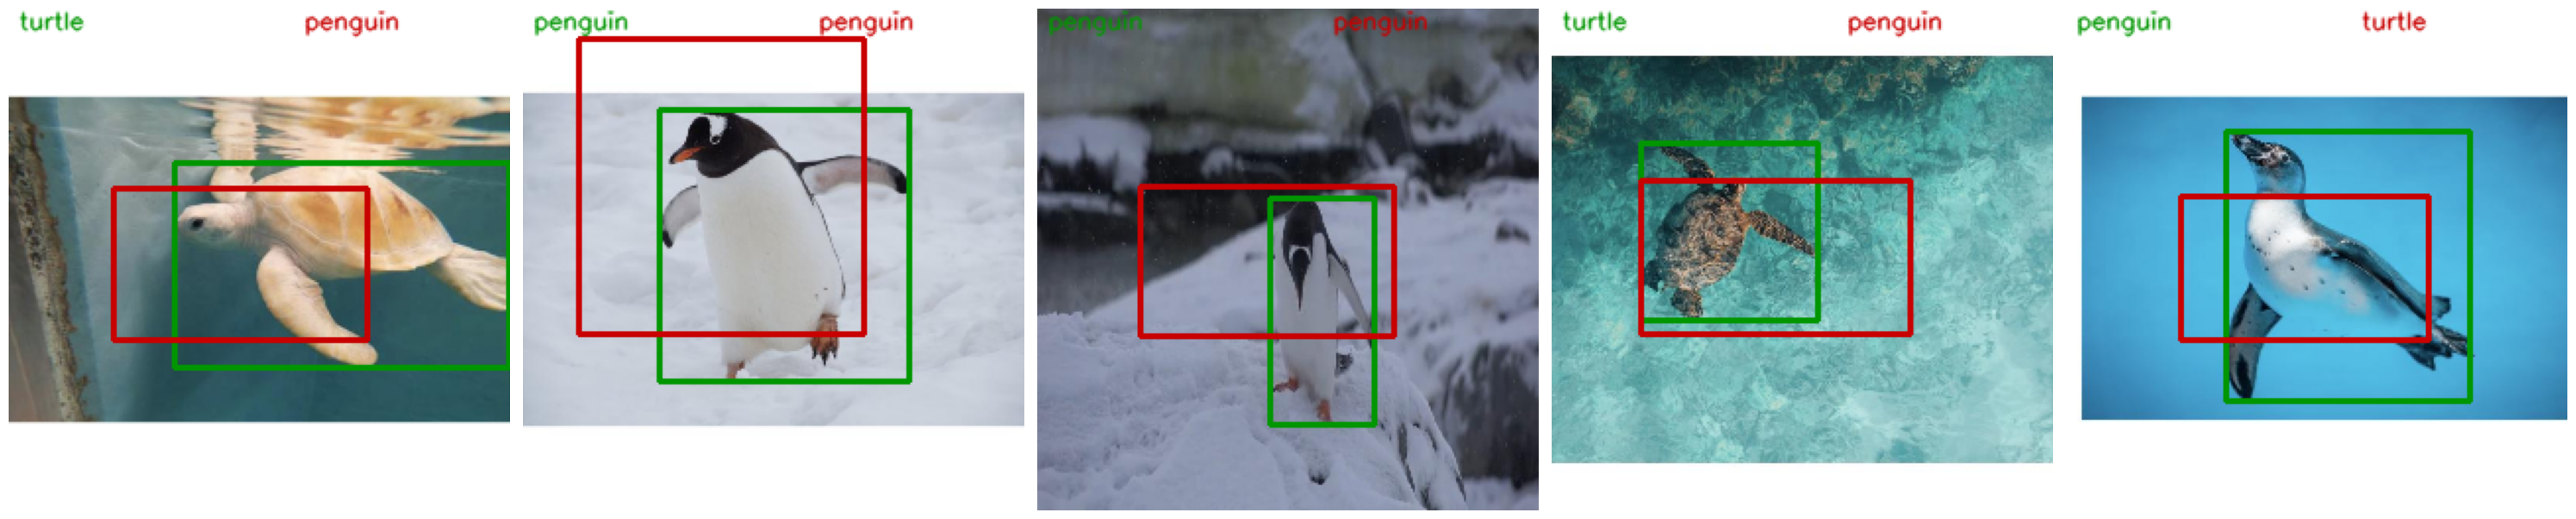

In [52]:
# Green: ground truth # Verde: verdad
imgs = draw_predictions(imgs, classes, bboxes, [(0, 150, 0)], (5, 10)) # Dibujar las predicciones

# Red: predicted # Rojo: predicho
pred_classes_ = [] # Inicializar la lista de clases predichas
for i in range(num_imgs): # Iterar a través de las imágenes
    temp = np.array([pred_classes[i]]) # Obtener la clase predicha
    pred_classes_.append(temp) # Añadir la clase predicha a la lista
imgs = draw_predictions(imgs, pred_classes_, pred_bboxes, [(200, 0, 0)], (150, 10)) # Dibujar las predicciones

fig, axes = plt.subplots(nrows=nrows, ncols=num_imgs // nrows, figsize=(30, 30)) # Crear una figura de Matplotlib

for i, ax in enumerate(axes.flat): # Iterar a través de los ejes
    ax.imshow(imgs[i]) # Mostrar la imagen
    ax.axis('off') # Desactivar los ejes

plt.tight_layout() # Ajustar el diseño
plt.show() # Mostrar la figura

In [53]:
!wget https://m.media-amazon.com/images/I/71aIJmfUTgL._AC_SL1500_.jpg
!ls

--2024-11-14 11:31:20--  https://m.media-amazon.com/images/I/71aIJmfUTgL._AC_SL1500_.jpg
Resolving m.media-amazon.com (m.media-amazon.com)... 184.26.127.154, 184.26.127.138, 2600:9000:2834:f000:1d:d7f6:39d4:e6e1, ...
Connecting to m.media-amazon.com (m.media-amazon.com)|184.26.127.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122516 (120K) [image/jpeg]
Saving to: '71aIJmfUTgL._AC_SL1500_.jpg'

71aIJmfUTgL._AC_SL1 100%[===================>] 119.64K   613KB/s    in 0.2s    

2024-11-14 11:31:21 (613 KB/s) - '71aIJmfUTgL._AC_SL1500_.jpg' saved [122516/122516]

 71aIJmfUTgL._AC_SL1500_.jpg
'800px-Gioconda_(copia_del_Museo_del_Prado_restaurada).jpg'


# 28.  Validación con imagen de pinguino de amazon

In [54]:
pickle_rick_img = io.imread('71aIJmfUTgL._AC_SL1500_.jpg') # Leer la imagen
pickle_rick_img = cv2.resize(pickle_rick_img, (h, w)) # Redimensionar la imagen
pickle_rick_img_=np.expand_dims(pickle_rick_img.transpose(2,0,1), 0) # Expandir las dimensiones de la imagen

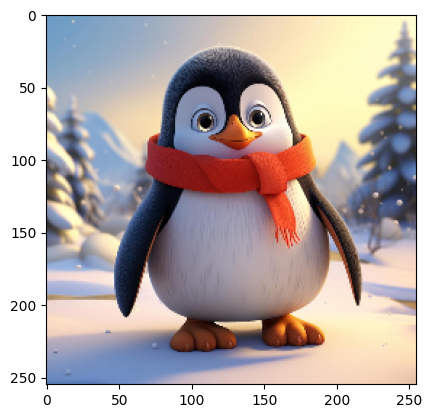

In [55]:
plt.imshow(pickle_rick_img) # Mostrar la imagen

In [56]:
pickle_rick_img.shape, pickle_rick_img_.shape # Mostrar las dimensiones de la imagen

((255, 255, 3), (1, 3, 255, 255))

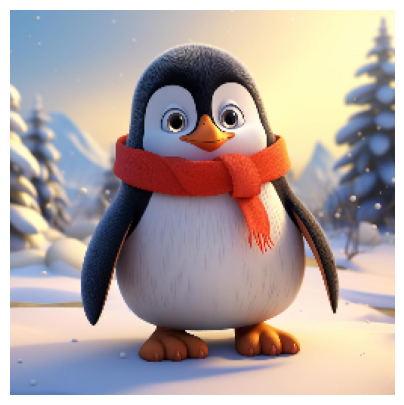

In [57]:
preds = model(torch.tensor(pickle_rick_img_).float().to(device)) # Obtener las predicciones
pred_classes = preds['class_id'].argmax(-1).detach().cpu().numpy() # Obtener las clases predichas
pred_bboxes = preds['bbox'].detach().cpu().numpy().tolist() # Obtener las cajas delimitadoras predichas
pred_class = id2obj[pred_classes[0]] # Obtener la clase predicha
xmin=int(pred_bboxes[0][0]*w) # Obtener las coordenadas de la caja delimitadora predicha
ymin=int(pred_bboxes[0][1]*h) # Obtener las coordenadas de la caja delimitadora predicha
xmax=int(pred_bboxes[0][2]*w) # Obtener las coordenadas de la caja delimitadora predicha
ymax=int(pred_bboxes[0][3]*h) # Obtener las coordenadas de la caja delimitadora predicha

pickle_rick_img_ = cv2.rectangle(pickle_rick_img, (xmin, ymin), (xmax, ymax), (255, 0, 0)) # Dibujar la caja delimitadora predicha
pickle_rick_img_ = cv2.putText(pickle_rick_img_, pred_class, (xmin, ymin-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA) # Añadir el texto de la clase predicha

plt.figure(figsize=(5, 5)) # Crear una figura de Matplotlib
plt.imshow(pickle_rick_img_) # Mostrar la imagen
plt.axis("off") # Desactivar los ejes
plt.show() # Mostrar la figura

#Pregunta: en la imagen no funciona los bounding box, ni tampoco la clasificación R// es porque está comentado #plt.axis("off"), se debe descomentar

# 29.  Guardar el modelo preentrenado en .pth

In [58]:
# Save the model to disk # Guardar el modelo en el disco
torch.save(model, 'pretrained_model.pth') # Guardar el modelo en el disco
#Pregunta: cómo se puede volver a cargar ese modelo, cómo se administra este tipo de archivo.
#R//model = torch.load('pretrained_model.pth')
#model.eval()  # Pon el modelo en modo de evaluación si solo lo necesitas para inferencia

# 30. Submission

In [59]:
# Perform inference on cpu in order to avoid memory problems # Realizar inferencia en la CPU para evitar problemas de memoria
# Pregunta: ¿qué es inferencia?
device = 'cuda' # Dispositivo
model = model.to(device) # Mover el modelo al dispositivo
test_root_dir = osp.join(DATA_DIR, "images") # Establecer el directorio raíz de las imágenes
test_df = pd.read_csv(osp.join(DATA_DIR, "test.csv")) # Leer el archivo CSV de prueba

test_ds = imageDataset(test_df, root_dir=test_root_dir, labeled=False, transform=eval_transforms,output_size=(255,255)) # Crear el conjunto de datos de prueba
test_data = DataLoader(test_ds, batch_size=1, num_workers=cpu_count(), shuffle=False) # Crear un DataLoader para el conjunto de datos de prueba

#Pregunta: por qué batch_size ? R/Establecer batch_size=1 es común en la inferencia, ya que permite procesar una imagen a la vez. Esto facilita la evaluación imagen por imagen y es útil si deseas analizar cada imagen individualmente, por ejemplo, para visualizar los resultados o depurar el modelo.

#Alfredo: cambiar batch_size?
class_preds = [] # Inicializar la lista de clases predichas
bbox_preds = [] # Inicializar la lista de cajas delimitadoras predichas

for batch in test_data: # Iterar a través de los datos de prueba
    batch_preds = model(batch['image'].float().to(device))# Obtener las predicciones
    class_pred = batch_preds['class_id'].argmax(-1).detach().cpu().numpy() # Obtener la clase predicha
    bbox_pred = batch_preds['bbox'].detach().cpu().numpy() # Obtener la caja delimitadora predicha
    class_preds.append(class_pred.squeeze()) # Añadir la clase predicha a la lista
    bbox_preds.append(bbox_pred.squeeze()) # Añadir la caja delimitadora predicha a la lista

In [60]:
class_preds = np.array(class_preds) # Convertir la lista de clases predichas en un array NumPy
bbox_preds = np.array(bbox_preds) # Convertir la lista de cajas delimitadoras predichas en un array NumPy

In [61]:
submission = pd.DataFrame( # Crear un DataFrame de Pandas
    index=test_df.filename, # Establecer el índice
    data={ # Datos
        'class_id': class_preds, # Clases predichas
        # Descomentar esta línea cuando generen el archivo de submissions final,
        # para incluir las predicciones de su modelo para regresión
        #'bbox': bbox_preds
    }
)

submission

,class_id
filename,
image_id_004_.jpg,0
image_id_010_.jpg,0
image_id_016_.jpg,0
image_id_024_.jpg,0
image_id_033_.jpg,0
...,...
image_id_545_.jpg,0
image_id_548_.jpg,0
image_id_551_.jpg,0


In [62]:
submission['class_id'] = np.where(submission['class_id']==0,1,2) # Cambiar las clases predichas

In [63]:
#submission['class_id']=submission['class_id'].replace(id2obj)

In [64]:
submission['class_id'].value_counts() # Contar las clases predichas

class_id
1    79
2    19
Name: count, dtype: int64

## 30.1 Submission Kaggle

In [65]:
submission.to_csv('submission.csv') # Guardar el archivo CSV de la presentación

## 30.2 Submission Intu

In [66]:
submission["x_min"] = bbox_preds[:, 0]*hw_real # Añadir la coordenada x mínima
submission["y_min"] = bbox_preds[:, 1]*hw_real # Añadir la coordenada y mínima
submission["x_max"] = bbox_preds[:, 2]*hw_real # Añadir la coordenada x máxima
submission["y_max"] = bbox_preds[:, 3]*hw_real # Añadir la coordenada y máxima
#Pregunta: aquí se debe devolver la normalización: ¿cómo se hace? R/ No, ya la estamos haciendo en este paso al multiplicar por hw_real.

In [67]:
submission.to_csv('submission_Intu.csv') # Guardar el archivo CSV de la presentación